In [148]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rocket-companies/train (1).csv
/kaggle/input/rocket-companies/test (1).csv


In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [150]:
def normalize_features_inplace(df, features):
    """
    Normalize specified features by dividing by their respective column sums.
    Modifies the DataFrame in place.
    
    Args:
        df (pd.DataFrame): The dataframe containing the features.
        features (list): List of column names to normalize.
    """
    for feat in features:
        total = df[feat].dropna().sum()
        df[f'norm_{feat}'] = df[feat] / total if total != 0 else df[feat]

In [151]:
train_df=pd.read_csv('/kaggle/input/rocket-companies/train (1).csv')
train_df.shape

(316970, 28)

In [152]:
train_df.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,0,6400.0,36 months,15.61,223.78,C,C3,Accountant,< 1 year,RENT,...,12.0,0.0,31228.0,97.6,22.0,f,INDIVIDUAL,0.0,0.0,"354 Palmer Cove\r\nWest Alexa, SD 48052"
1,1,25000.0,60 months,19.99,662.21,E,E1,Electronic Technician,10+ years,MORTGAGE,...,18.0,1.0,24755.0,42.1,64.0,f,INDIVIDUAL,7.0,1.0,"8778 Lopez Street\r\nNew Jacqueline, TN 05113"
2,2,15000.0,36 months,5.32,451.73,A,A1,Transportation Coordinator,10+ years,MORTGAGE,...,12.0,0.0,8925.0,23.3,23.0,w,INDIVIDUAL,4.0,0.0,"21752 William Forest\r\nJeremyberg, WA 05113"
3,3,16000.0,36 months,15.61,559.44,C,C3,ironworker,< 1 year,RENT,...,8.0,0.0,6972.0,79.2,17.0,f,INDIVIDUAL,0.0,0.0,"2707 Brittany Prairie Apt. 007\r\nThomasville,..."
4,4,8725.0,36 months,12.12,290.30,B,B3,Hathaway-Sycamores child & Family Serv,10+ years,MORTGAGE,...,10.0,0.0,25397.0,45.8,32.0,f,INDIVIDUAL,7.0,0.0,"PSC 1131, Box 5667\r\nAPO AA 00813"


In [153]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316970 entries, 0 to 316969
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            316970 non-null  int64  
 1   loan_amnt             316970 non-null  float64
 2   term                  316970 non-null  object 
 3   int_rate              316970 non-null  float64
 4   installment           316970 non-null  float64
 5   grade                 316970 non-null  object 
 6   sub_grade             316970 non-null  object 
 7   emp_title             298572 non-null  object 
 8   emp_length            302294 non-null  object 
 9   home_ownership        316970 non-null  object 
 10  annual_inc            316970 non-null  float64
 11  verification_status   316970 non-null  object 
 12  issue_d               316970 non-null  object 
 13  loan_status           316970 non-null  object 
 14  purpose               316970 non-null  object 
 15  

In [154]:
train_df.isnull().sum()

Unnamed: 0                  0
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               18398
emp_length              14676
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1397
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                213
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                30217
pub_rec_bankruptcies      430
address                     0
dtype: int64

In [155]:
train_df['loan_status'].value_counts()

loan_status
Fully Paid     254633
Charged Off     62337
Name: count, dtype: int64

# Feature Engineering

**Annual Income**

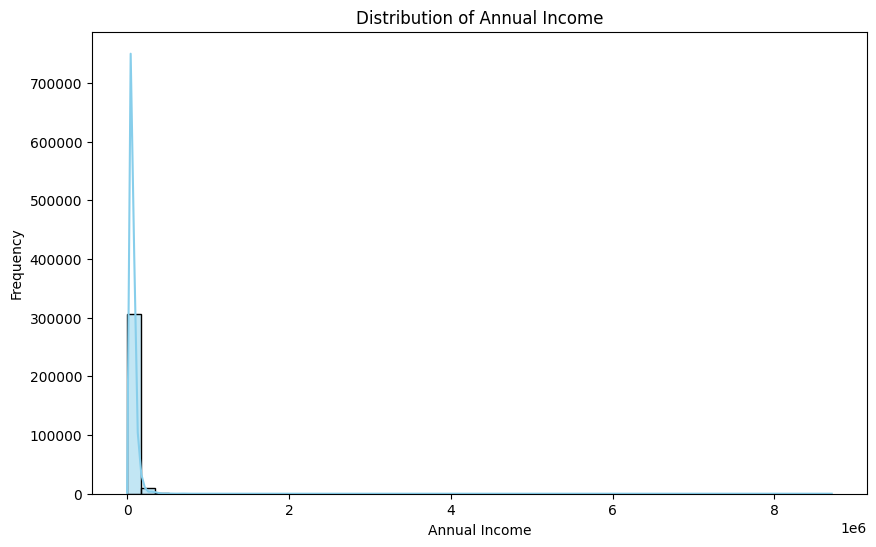

In [156]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['annual_inc'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='loan_status', ylabel='annual_inc'>

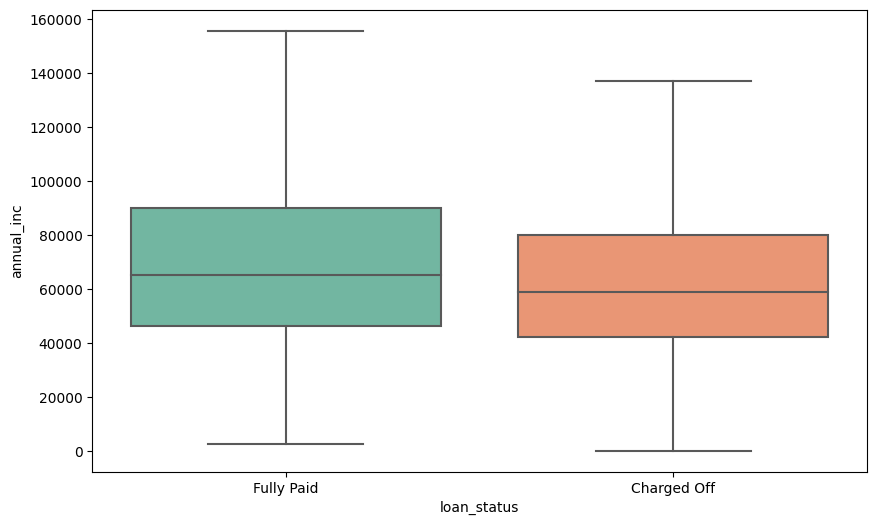

In [157]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=train_df, palette='Set2', showfliers=False)

**Observations**
* The median annual income for Charged Off loans is lower than for Fully Paid loans.
* This suggests that borrowers with lower incomes are more likely to default.

**Loan to income ratio**

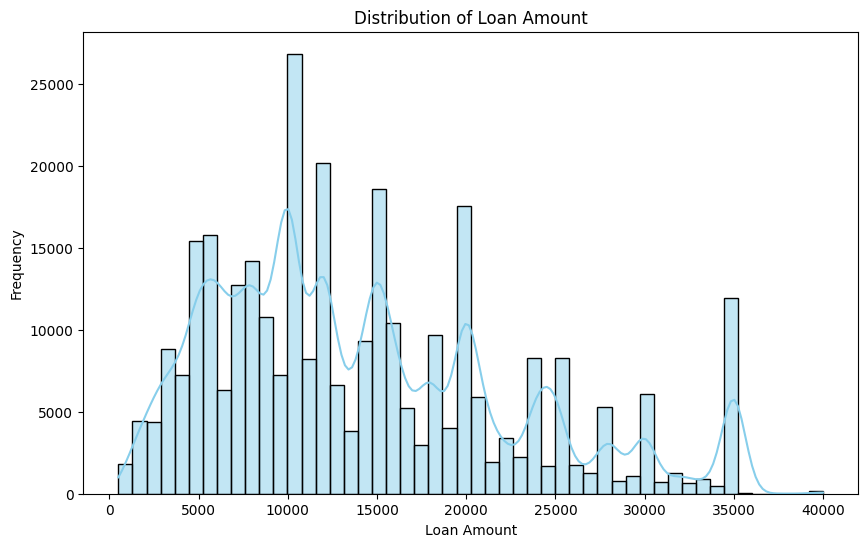

In [158]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['loan_amnt'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

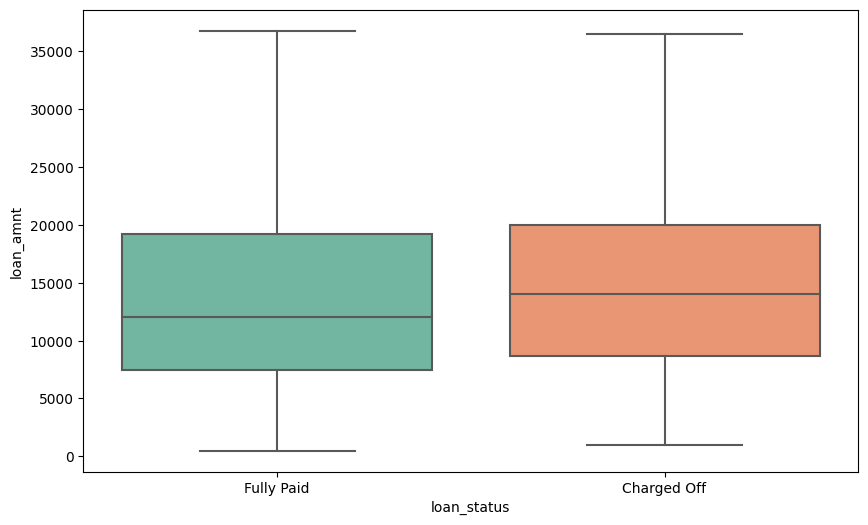

In [159]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=train_df, palette='Set2', showfliers=False)

In [160]:
import scipy.stats as stats

In [161]:
zero_income_count = (train_df['annual_inc'] == 0).sum()
print(f"Number of borrowers with zero income: {zero_income_count}")

Number of borrowers with zero income: 1


In [162]:
train_df = train_df[train_df['annual_inc'] > 0]

In [163]:
train_df.shape

(316969, 28)

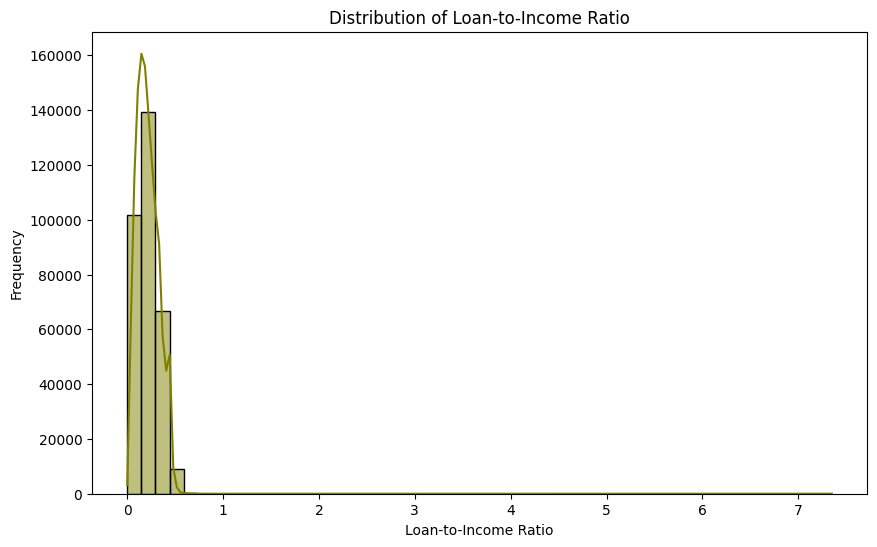

In [164]:
train_df['loan_to_income'] = train_df['loan_amnt'] / train_df['annual_inc']
plt.figure(figsize=(10, 6))
sns.histplot(train_df['loan_to_income'], kde=True, bins=50, color='olive')
plt.title('Distribution of Loan-to-Income Ratio')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='loan_status', ylabel='loan_to_income'>

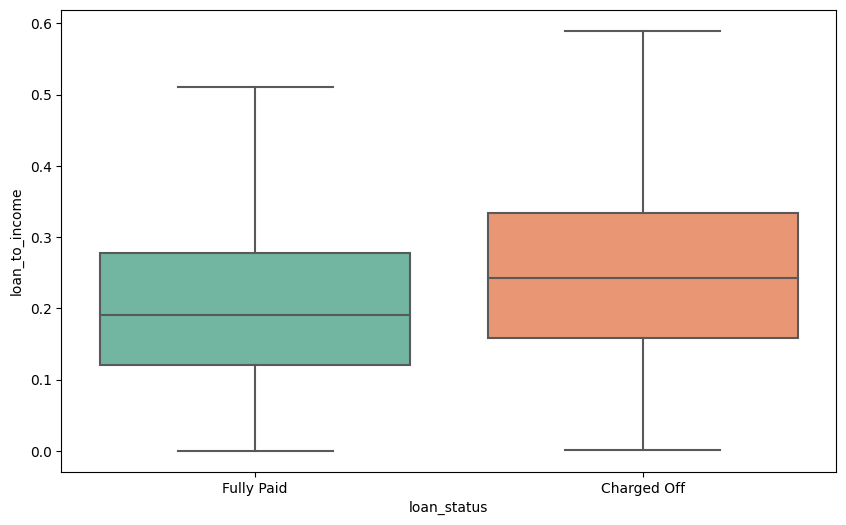

In [165]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_to_income', data=train_df, palette='Set2', showfliers=False)

**Observations**
* The median Loan-to-Income Ratio appears slightly higher for Charged Off loans than for Fully Paid loans.
* This suggests that borrowers with a higher debt burden relative to income might be more likely to default.
* There’s more variability in the loan-to-income ratio among people who default based on the wider IQR range.

In [166]:
skewness = train_df['loan_to_income'].skew()
print(f"Skewness of Loan-to-Income Ratio: {skewness:.4f}")

Skewness of Loan-to-Income Ratio: 1.4046


In [167]:
fully_paid = train_df[train_df['loan_status'] == 'Fully Paid']['loan_to_income']
charged_off = train_df[train_df['loan_status'] == 'Charged Off']['loan_to_income']
u_stat, p_value = stats.mannwhitneyu(fully_paid, charged_off, alternative='two-sided')

print(f"Mann-Whitney U Statistic: {u_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference in loan_to_income ratio between Fully Paid and Charged Off loans is statistically significant.")
else:
    print("No statistically significant difference in loan_to_income ratio between Fully Paid and Charged Off loans.")

Mann-Whitney U Statistic: 6205190251.5
P-value: 0.0
The difference in loan_to_income ratio between Fully Paid and Charged Off loans is statistically significant.


<Figure size 800x500 with 0 Axes>

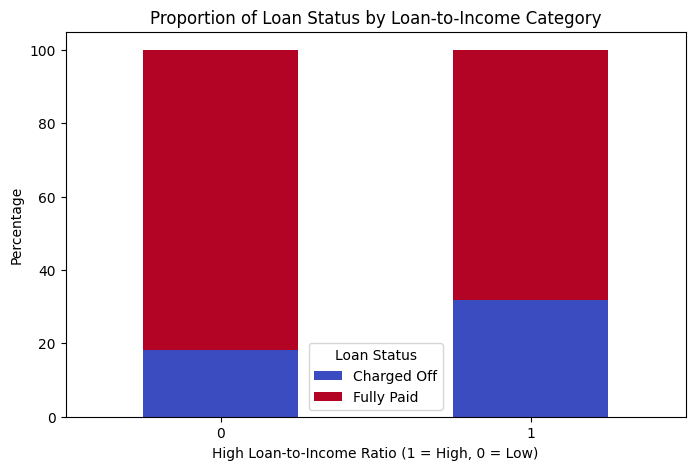

loan_status          Charged Off  Fully Paid
high_loan_to_income                         
0                      18.316710   81.683290
1                      31.843911   68.156089


In [168]:
high_threshold = np.percentile(train_df['loan_to_income'], 90)

train_df['high_loan_to_income'] = (train_df['loan_to_income'] > high_threshold).astype(int)

high_risk_counts = train_df.groupby(['high_loan_to_income', 'loan_status']).size().unstack()

high_risk_percent = high_risk_counts.div(high_risk_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 5))
high_risk_percent.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8, 5))
plt.title('Proportion of Loan Status by Loan-to-Income Category')
plt.ylabel('Percentage')
plt.xlabel('High Loan-to-Income Ratio (1 = High, 0 = Low)')
plt.legend(title='Loan Status')
plt.xticks(rotation=0)
plt.show()

print(high_risk_percent)

**Observations**

Higher loan-to-income ratio increases the likelihood of default:
* 31.8% of high loan-to-income borrowers defaulted (Charged Off), compared to only 18.3% of low loan-to-income borrowers.
* This is a significant jump in default rate.

Lower loan-to-income borrowers are more likely to fully repay:
* 81.7% of low loan-to-income borrowers fully paid their loans.
* Only 68.2% of high loan-to-income borrowers fully paid.

**Interest Rate**

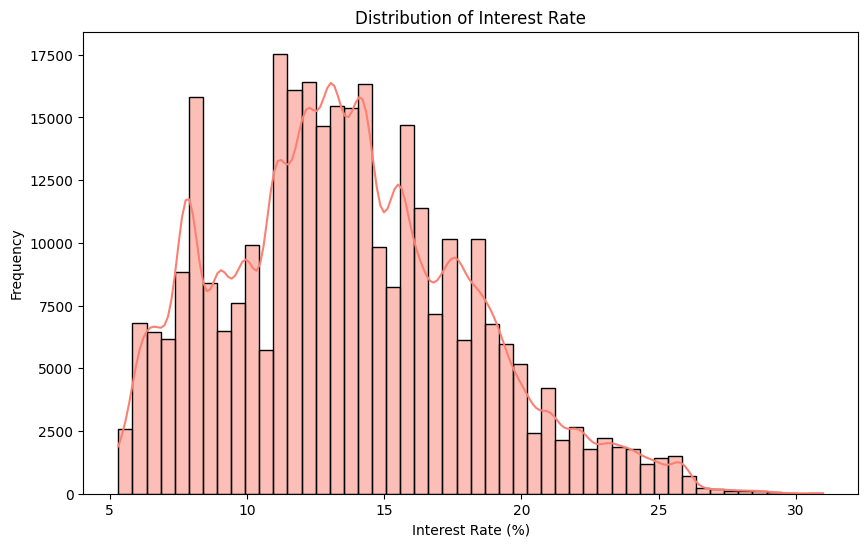

In [169]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['int_rate'], kde=True, bins=50, color='salmon')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

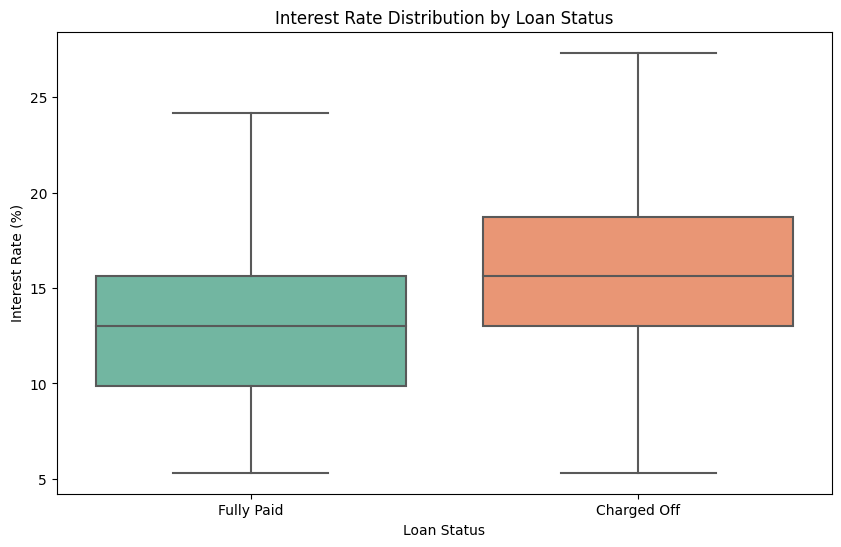

In [170]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=train_df, palette='Set2', showfliers=False)
plt.title('Interest Rate Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.show()

**Observations**
* Charged Off loans have a higher median int_rate than Fully Paid loans.
* Higher interest rates signal riskier borrowers, making it a strong predictor

**Total Interest Owed**

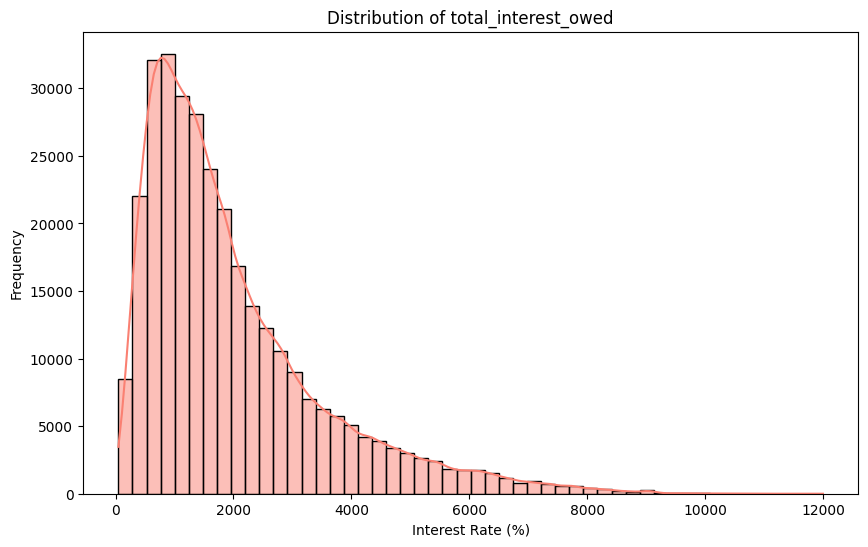

In [171]:
train_df['total_interest_owed'] = train_df['loan_amnt'] * (train_df['int_rate'] / 100)

plt.figure(figsize=(10, 6))
sns.histplot(train_df['total_interest_owed'], kde=True, bins=50, color='salmon')
plt.title('Distribution of total_interest_owed')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

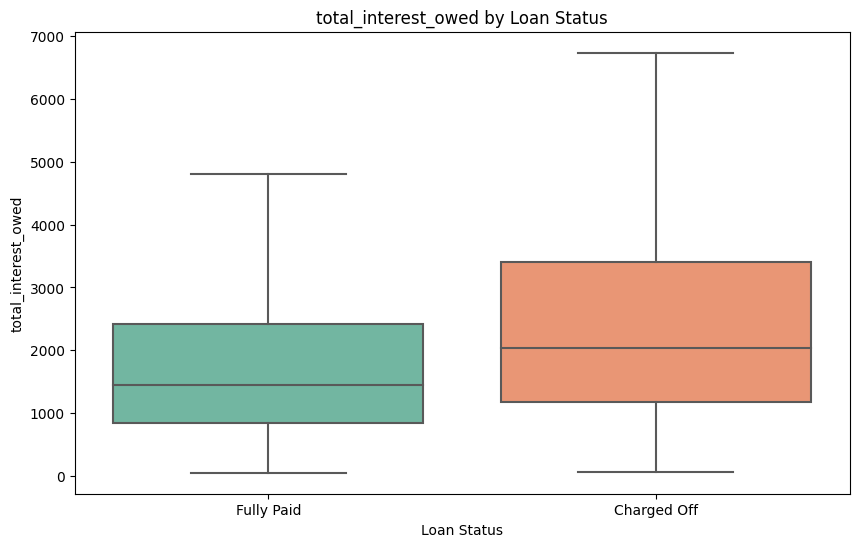

In [172]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='total_interest_owed', data=train_df, palette='Set2', showfliers=False)
plt.title('total_interest_owed by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('total_interest_owed')
plt.show()

**Observations**
* The median interest owed is noticeably higher for Charged Off loans than for Fully Paid loans.
* This suggests that borrowers who default tend to owe more in interest, possibly due to higher loan amounts, longer loan terms, or higher interest rates.

**Installment-to-Income Ratio (installment)**

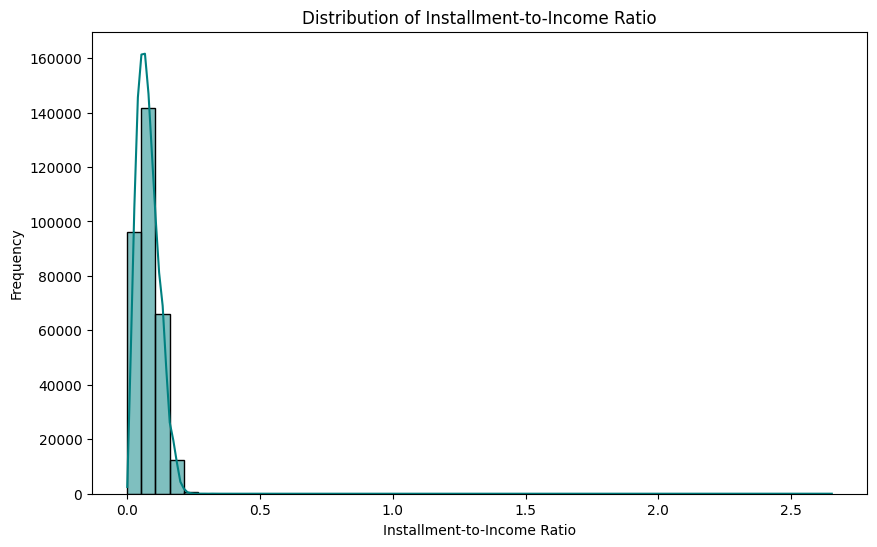

In [173]:
train_df['installment_to_income_ratio'] = train_df['installment'] / (train_df['annual_inc'] / 12)

plt.figure(figsize=(10, 6))
sns.histplot(train_df['installment_to_income_ratio'], kde=True, bins=50, color='teal')
plt.title('Distribution of Installment-to-Income Ratio')
plt.xlabel('Installment-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

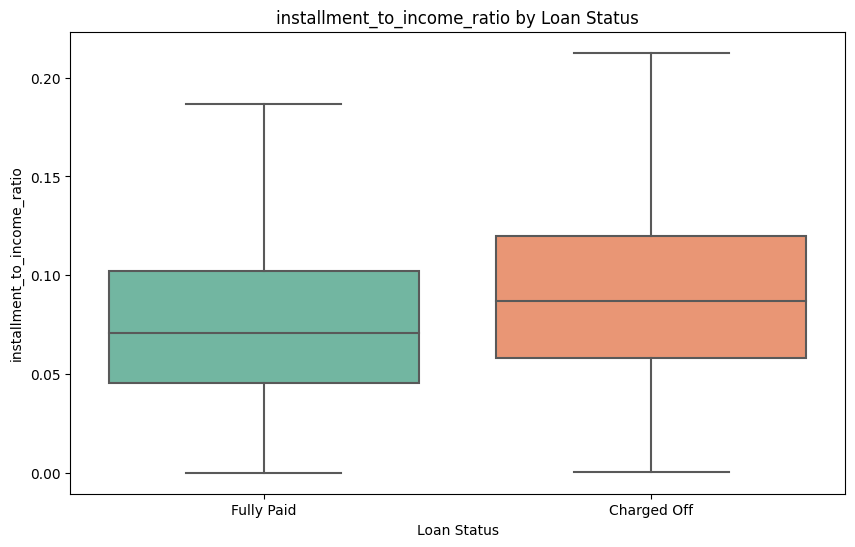

In [174]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='installment_to_income_ratio', data=train_df, palette='Set2', showfliers=False)
plt.title('installment_to_income_ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('installment_to_income_ratio')
plt.show()

**Observations**
* The median installment-to-income ratio is higher for Charged Off loans than for Fully Paid loans.
* This suggests that borrowers who allocate a higher percentage of their income toward loan installments are more likely to default.

**Revol Util**

In [175]:
train_df.isnull().sum()

Unnamed: 0                         0
loan_amnt                          0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      18397
emp_length                     14675
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
purpose                            0
title                           1397
dti                                0
earliest_cr_line                   0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       213
total_acc                          0
initial_list_status                0
application_type                   0
mort_acc                       30217
pub_rec_bankruptcies             430
a

In [176]:
# train_df.dropna(subset=['revol_util','pub_rec_bankruptcies'], axis=0, inplace=True)

In [177]:
train_df.shape

(316969, 32)

**Debt to income ratio**

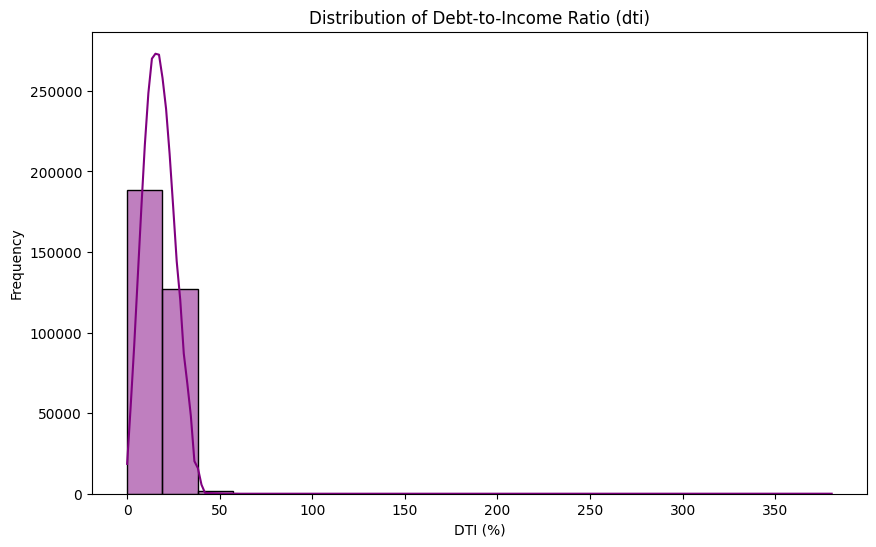

In [178]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['dti'], kde=True, bins=20, color='purple')
plt.title('Distribution of Debt-to-Income Ratio (dti)')
plt.xlabel('DTI (%)')
plt.ylabel('Frequency')
plt.show()

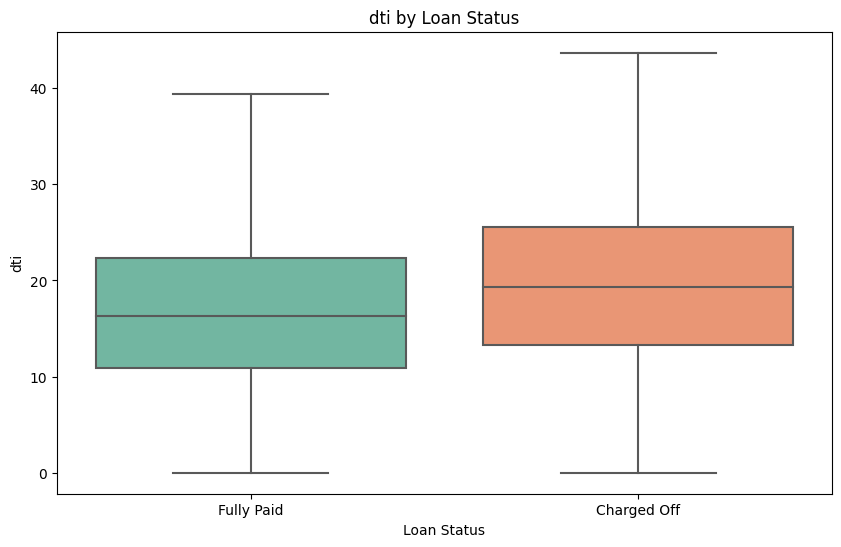

In [179]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=train_df, palette='Set2', showfliers=False)
plt.title('dti by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('dti')
plt.show()

**Observations**
* The median debt-to-income ratio (dti) is higher for Charged Off loans than for Fully Paid loans.
* This suggests that borrowers with higher total debt burdens relative to income are more likely to default.

In [180]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import pandas as pd

# features = train_df[['loan_to_income', 'int_rate', 'annual_inc', 'total_interest_owed',
#                      'installment_to_income_ratio', 'dti']]

# vif_data = pd.DataFrame()
# vif_data["Feature"] = features.columns
# vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# print(vif_data)


**Revolving Utilization**

Missing revol_util: 213


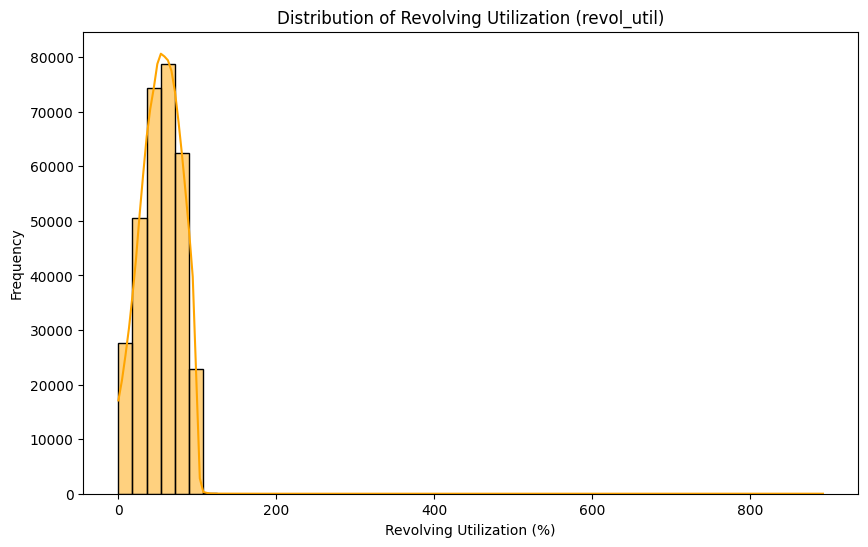

In [181]:
print("Missing revol_util:", train_df['revol_util'].isnull().sum())

plt.figure(figsize=(10, 6))
sns.histplot(train_df['revol_util'].dropna(), kde=True, bins=50, color='orange')
plt.title('Distribution of Revolving Utilization (revol_util)')
plt.xlabel('Revolving Utilization (%)')
plt.ylabel('Frequency')
plt.show()

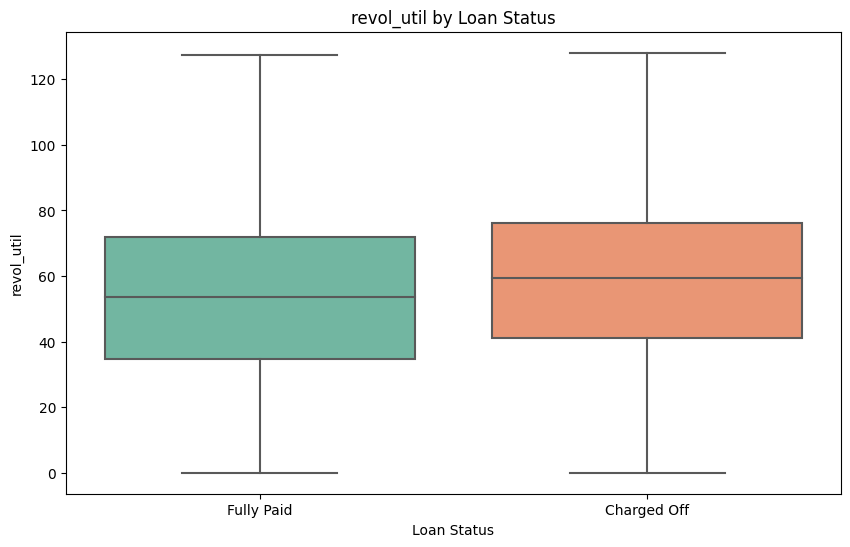

In [182]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='revol_util', data=train_df, palette='Set2', showfliers=False)
plt.title('revol_util by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('revol_util')
plt.show()

**Observations**
* The median revolving credit utilization (revol_util) is higher for Charged Off loans than for Fully Paid loans.
* This suggests that borrowers who use a higher percentage of their available revolving credit (credit cards, lines of credit) are more likely to default.

**Total Accounts**

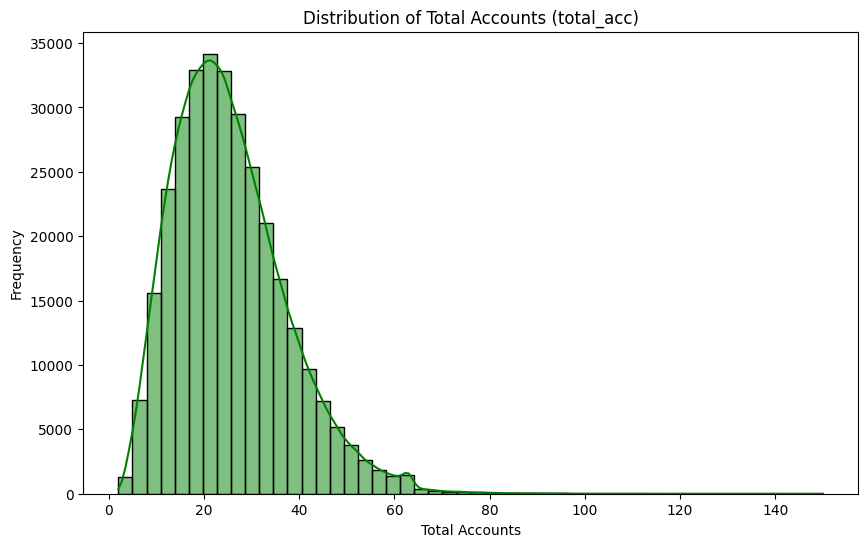

In [183]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['total_acc'], kde=True, bins=50, color='green')
plt.title('Distribution of Total Accounts (total_acc)')
plt.xlabel('Total Accounts')
plt.ylabel('Frequency')
plt.show()

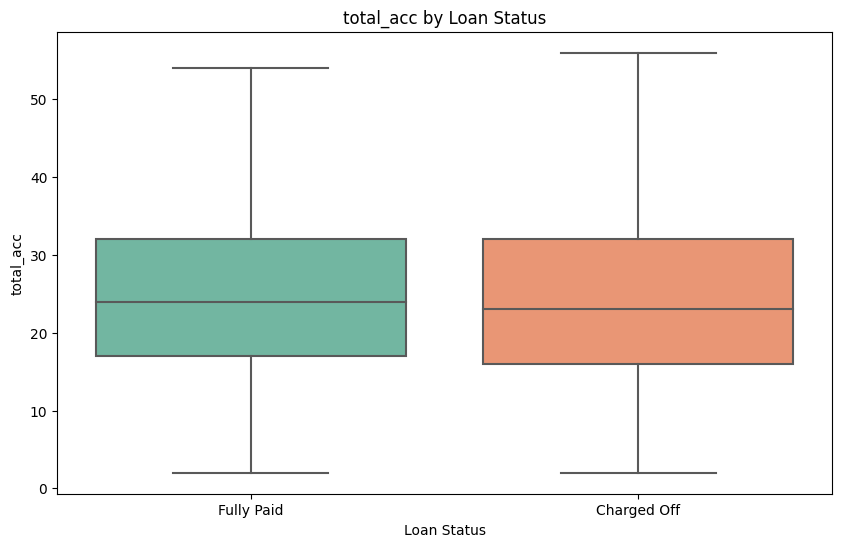

In [184]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='total_acc', data=train_df, palette='Set2', showfliers=False)
plt.title('total_acc by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('total_acc')
plt.show()

**Open Accounts**

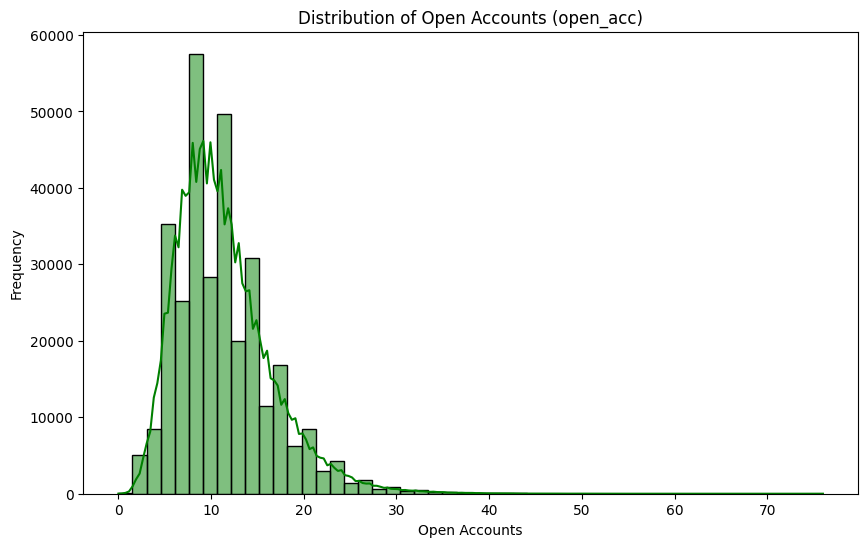

In [185]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['open_acc'], kde=True, bins=50, color='green')
plt.title('Distribution of Open Accounts (open_acc)')
plt.xlabel('Open Accounts')
plt.ylabel('Frequency')
plt.show()

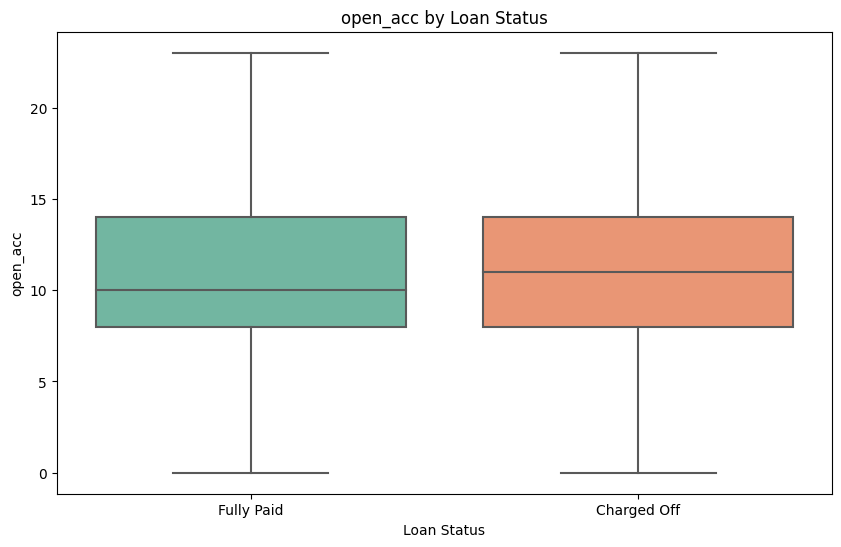

In [186]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='open_acc', data=train_df, palette='Set2', showfliers=False)
plt.title('open_acc by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('open_acc')
plt.show()

**Active Account Percentage**

In [187]:
train_df['active_credit_pct'] = train_df.apply(lambda row: row['open_acc'] / row['total_acc']
                                                 if row['total_acc'] > 0 else np.nan, axis=1)

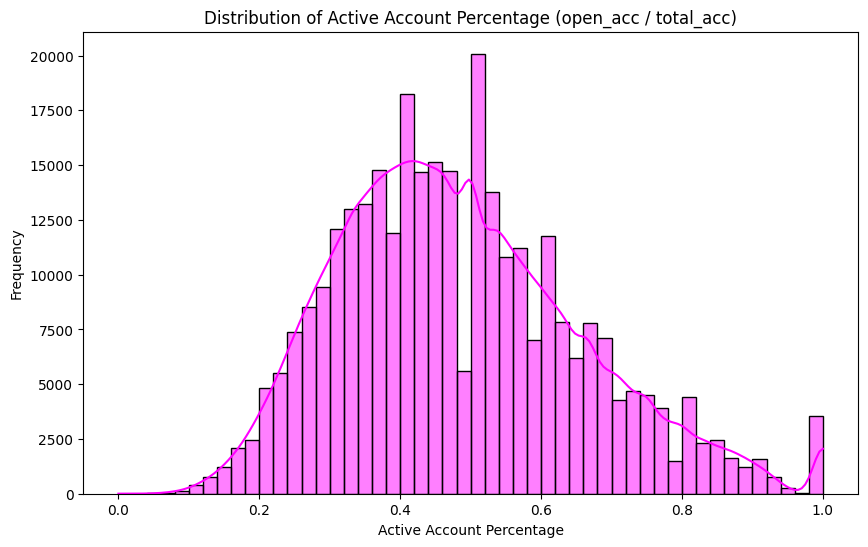

In [188]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['active_credit_pct'], kde=True, bins=50, color='magenta')
plt.title('Distribution of Active Account Percentage (open_acc / total_acc)')
plt.xlabel('Active Account Percentage')
plt.ylabel('Frequency')
plt.show()

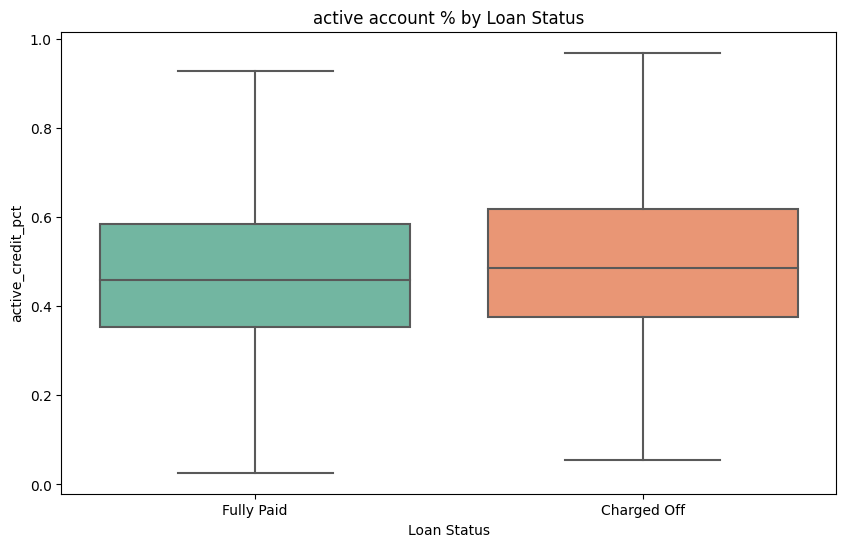

In [189]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='active_credit_pct', data=train_df, palette='Set2', showfliers=False)
plt.title('active account % by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('active_credit_pct')
plt.show()

**Observations**
* The median active account percentage is slightly higher for Charged Off loans than Fully Paid loans.
* This suggests that borrowers with a higher proportion of open accounts relative to their total accounts may have a slightly higher risk of default.

**Credit Age**

In [190]:
train_df['earliest_cr_line'] = pd.to_datetime(train_df['earliest_cr_line'], errors='coerce')

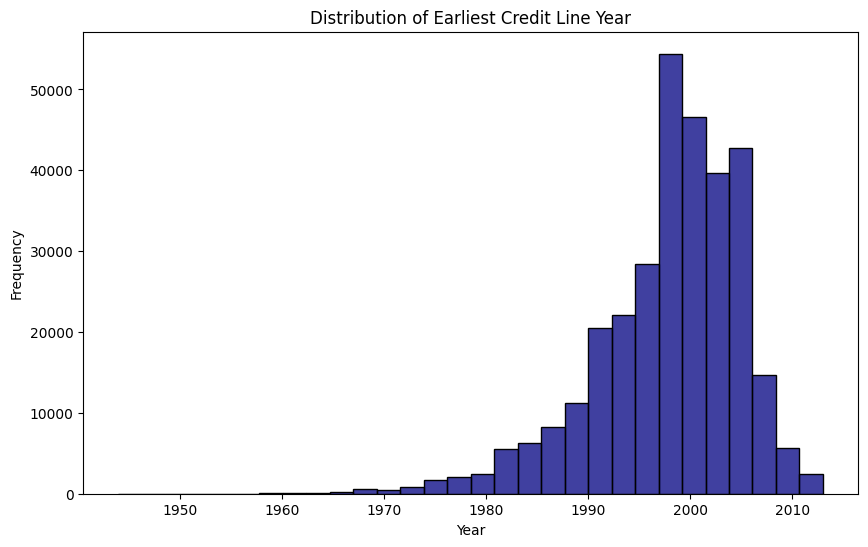

In [191]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['earliest_cr_line'].dt.year.dropna(), bins=30, color='navy')
plt.title('Distribution of Earliest Credit Line Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [192]:
current_year = pd.Timestamp('now').year
train_df['credit_age'] = current_year - train_df['earliest_cr_line'].dt.year

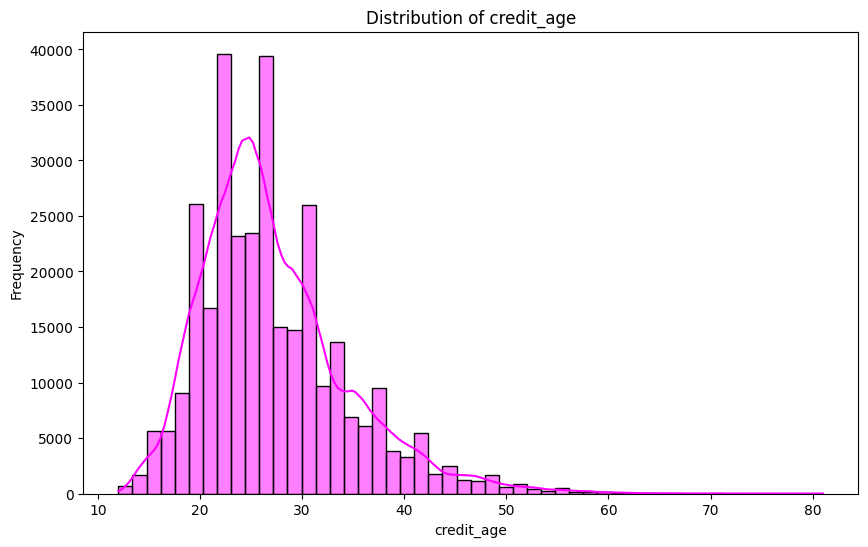

In [193]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['credit_age'], kde=True, bins=50, color='magenta')
plt.title('Distribution of credit_age')
plt.xlabel('credit_age')
plt.ylabel('Frequency')
plt.show()

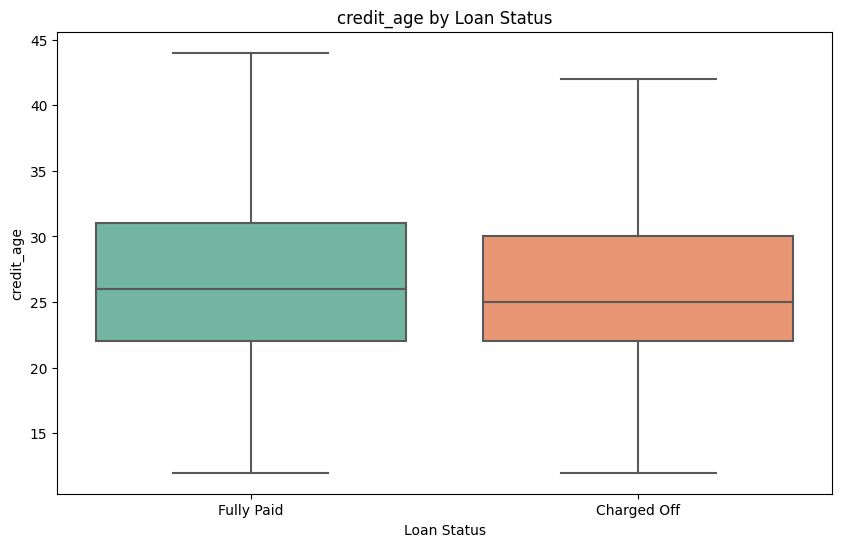

In [194]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='credit_age', data=train_df, palette='Set2', showfliers=False)
plt.title('credit_age by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('credit_age')
plt.show()

**Observations**
* The median credit age is slightly higher for Fully Paid loans compared to Charged Off loans.
* This aligns with industry expectations—borrowers with longer credit histories tend to be more financially stable and less likely to default.

**Mortgage Debt Ratio**

In [195]:
!pip install missingno statsmodels

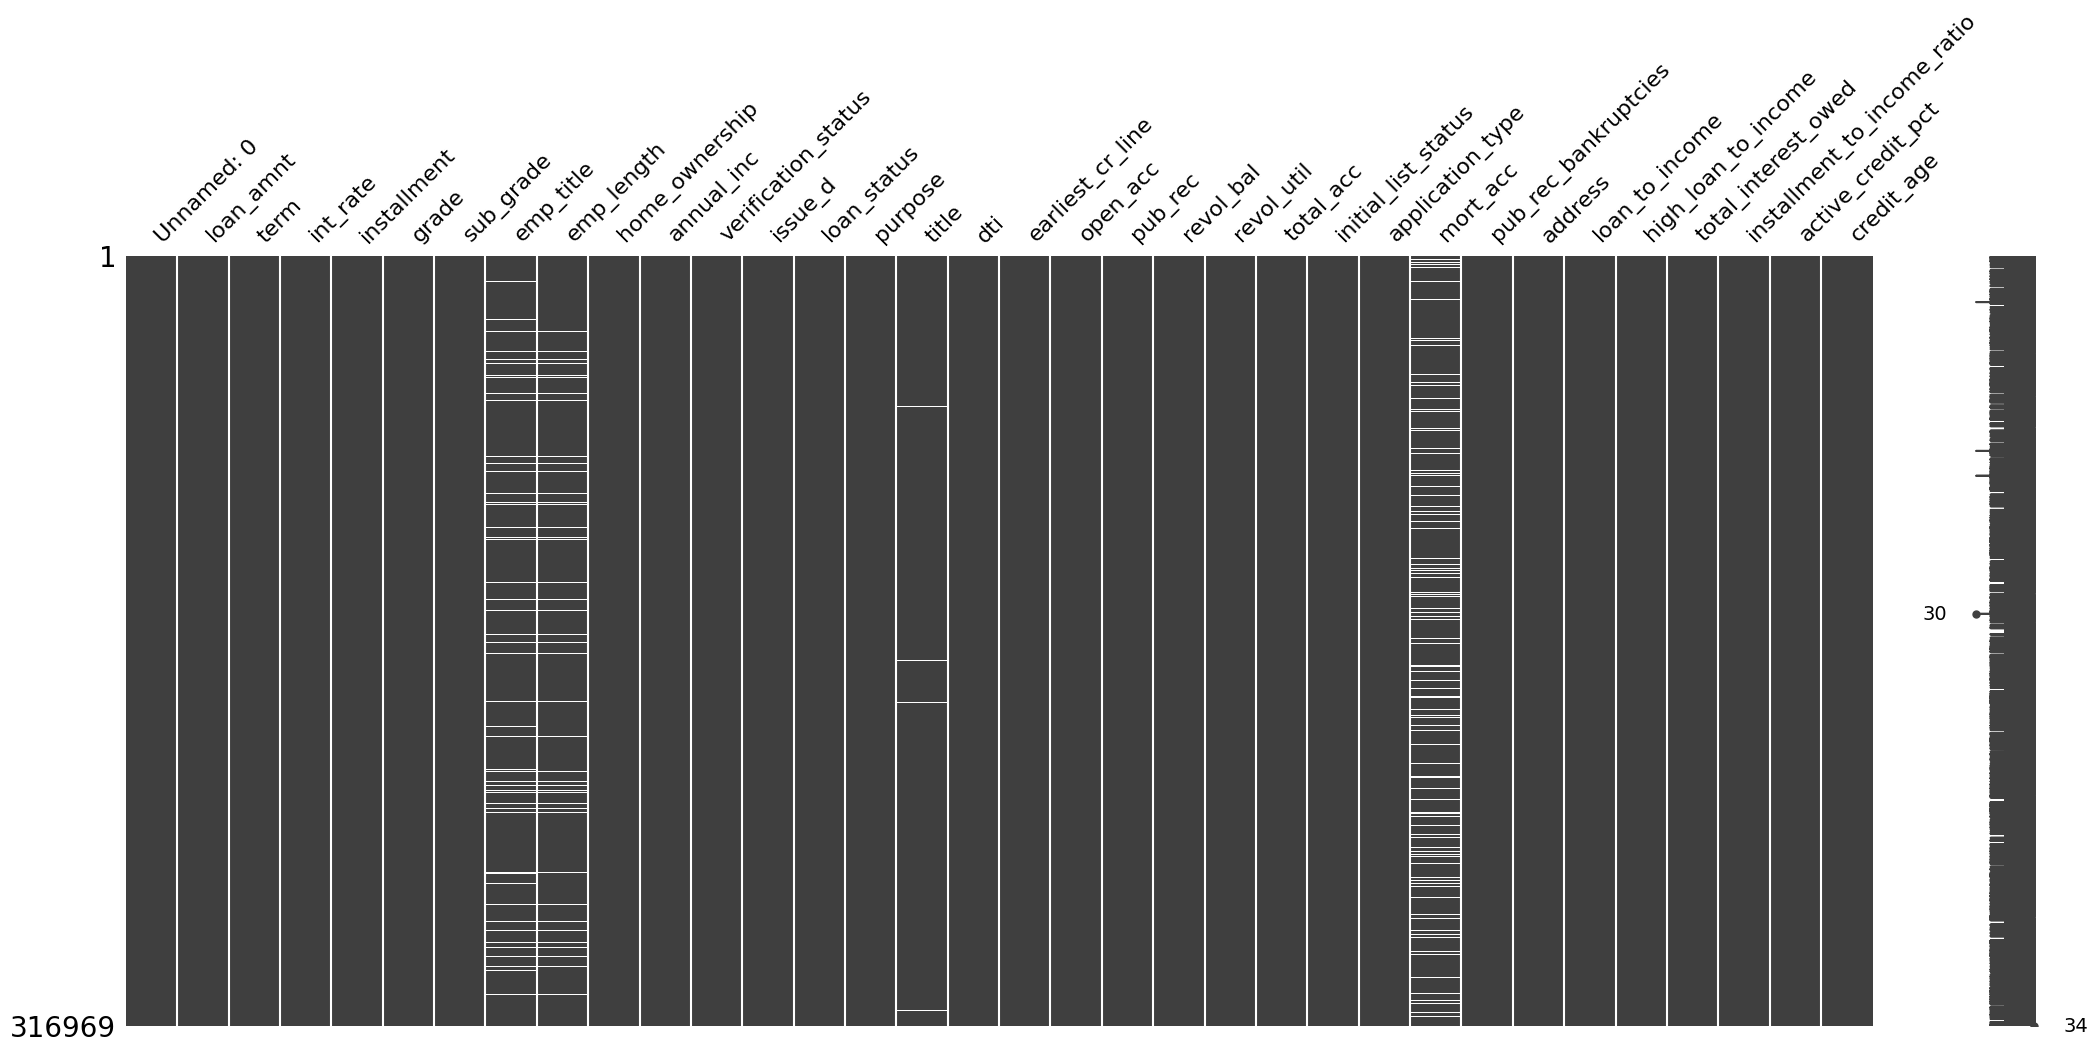

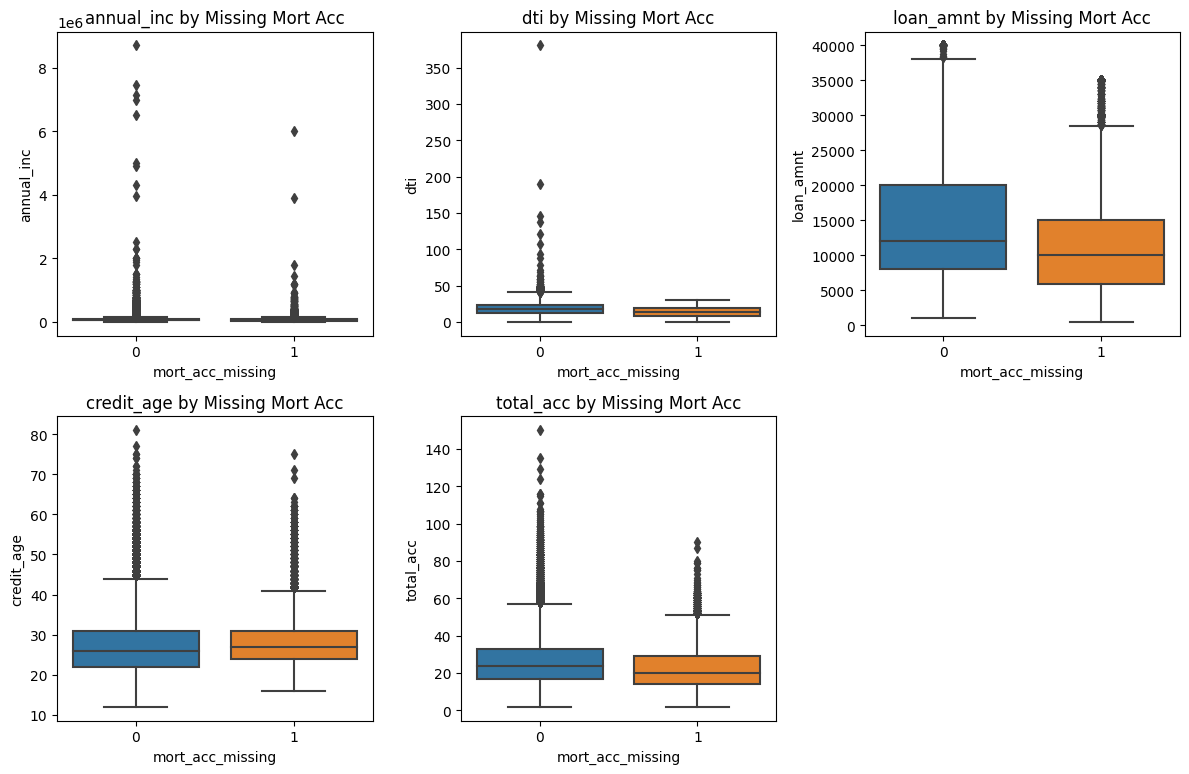

In [196]:
import missingno as msno

msno.matrix(train_df)
plt.show()

train_df['mort_acc_missing'] = train_df['mort_acc'].isnull().astype(int)

features_to_check = ['annual_inc', 'dti', 'loan_amnt', 'credit_age', 'total_acc']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='mort_acc_missing', y=feature, data=train_df)
    plt.title(f'{feature} by Missing Mort Acc')

plt.tight_layout()
plt.show()

In [197]:
mort_acc_medians = train_df.groupby('total_acc')['mort_acc'].median()

def fill_mort_acc(row):
    if pd.isna(row['mort_acc']):
        return mort_acc_medians.get(row['total_acc'], train_df['mort_acc'].median())
    else:
        return row['mort_acc']

train_df['mort_acc'] = train_df.apply(fill_mort_acc, axis=1)

In [198]:
train_df['mort_acc'].isnull().sum()

0

In [51]:
# mort_df=train_df[train_df['mort_acc'].isnull()]

In [52]:
# mort_df['loan_status'].value_counts()

In [53]:
# # Handling missing values using Random Forest

# from sklearn.ensemble import RandomForestRegressor

# train_known = train_df[train_df['mort_acc'].notnull()]
# train_missing = train_df[train_df['mort_acc'].isnull()]

# X_train = train_known.drop(columns=['mort_acc'])
# y_train = train_known['mort_acc']

# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# X_missing = train_missing.drop(columns=['mort_acc'])
# train_missing['mort_acc'] = rf.predict(X_missing)

# train_df.update(train_missing)

In [54]:
# train_df['mortgage_debt_ratio'] = train_df['mort_acc'] / train_df['total_acc']
# train_df['mortgage_debt_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)  

In [55]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='loan_status', y='mortgage_debt_ratio', data=train_df, palette='Set2', showfliers=False)
# plt.title('mortgage_debt_ratio by Loan Status')
# plt.xlabel('Loan Status')
# plt.ylabel('mortgage_debt_ratio')
# plt.show()

**Home Ownership**

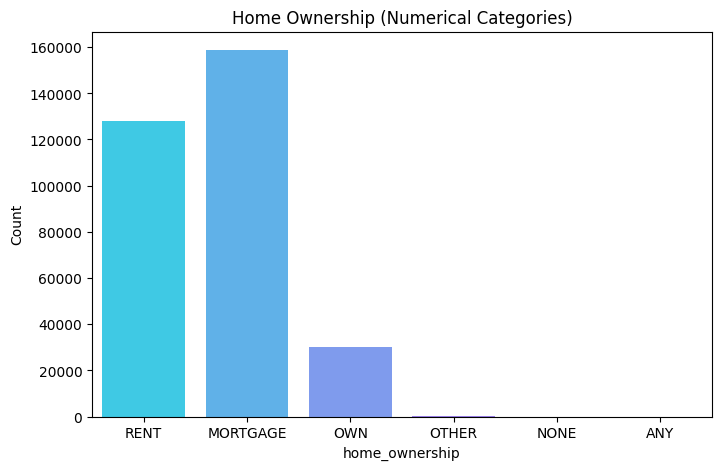

In [199]:
plt.figure(figsize=(8, 5))
sns.countplot(x='home_ownership', data=train_df, palette='cool')
plt.title('Home Ownership (Numerical Categories)')
plt.ylabel('Count')
plt.show()

**Employment Length**

In [200]:
train_df['emp_length'].isnull().sum()

14675

In [201]:
for year in train_df.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{train_df[train_df.emp_length == year].loan_status.value_counts(normalize=True)}")

< 1 year years in this position:
loan_status
Fully Paid     0.795171
Charged Off    0.204829
Name: proportion, dtype: float64
10+ years years in this position:
loan_status
Fully Paid     0.815174
Charged Off    0.184826
Name: proportion, dtype: float64
6 years years in this position:
loan_status
Fully Paid     0.809033
Charged Off    0.190967
Name: proportion, dtype: float64
8 years years in this position:
loan_status
Fully Paid     0.79867
Charged Off    0.20133
Name: proportion, dtype: float64
4 years years in this position:
loan_status
Fully Paid     0.808733
Charged Off    0.191267
Name: proportion, dtype: float64
3 years years in this position:
loan_status
Fully Paid     0.804138
Charged Off    0.195862
Name: proportion, dtype: float64
2 years years in this position:
loan_status
Fully Paid     0.807134
Charged Off    0.192866
Name: proportion, dtype: float64
5 years years in this position:
loan_status
Fully Paid     0.80768
Charged Off    0.19232
Name: proportion, dtype: float64
9

**Observations**
* As target distribution is almost similar among the employee length categories, we cant drop the null values.
* Instead we can drop the entire column or fill it with Unknown, so that the model picks up the pattern.

In [202]:
train_df['emp_length'].fillna('Unknown',inplace=True)

In [203]:
train_df['emp_length'].isnull().sum()

0

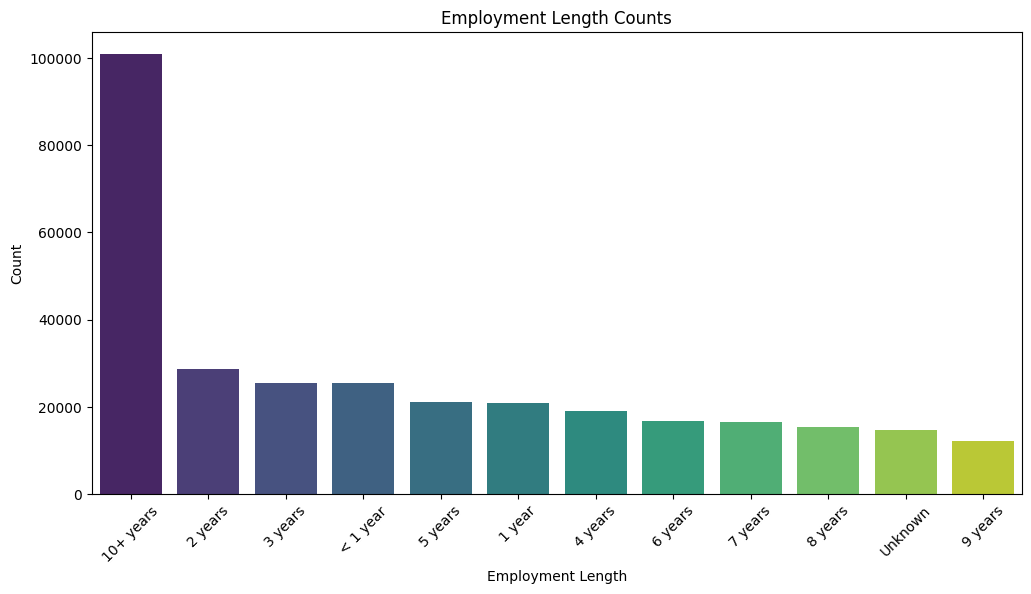

In [204]:
emp_length_counts = train_df['emp_length'].fillna('Unknown').value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=emp_length_counts.index, y=emp_length_counts.values, palette='viridis')
plt.title('Employment Length Counts')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Grade and Subgrade**

In [205]:
train_df['grade'].isnull().sum()

0

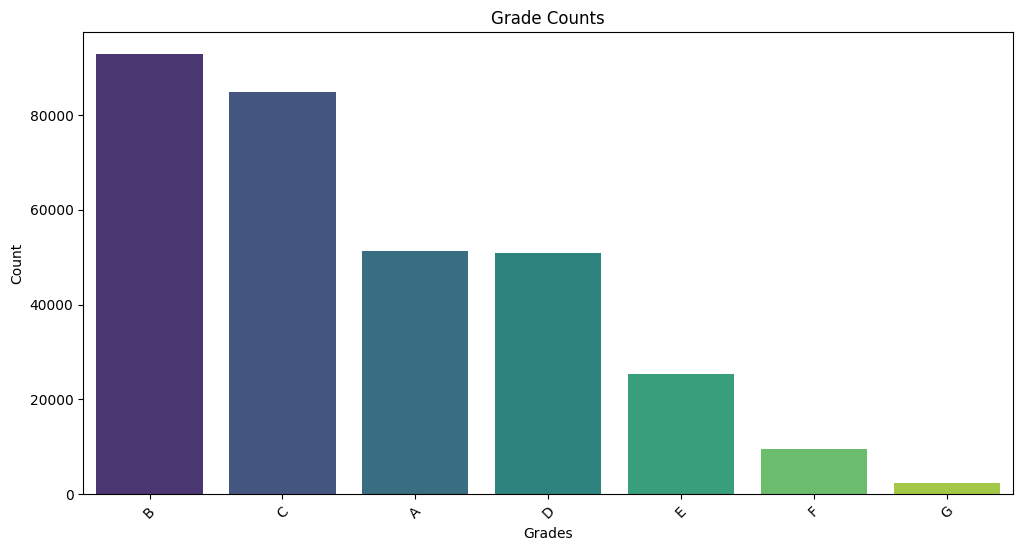

In [62]:
grade_count = train_df['grade'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=grade_count.index, y=grade_count.values, palette='viridis')
plt.title('Grade Counts')
plt.xlabel('Grades')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [63]:
train_df['sub_grade'].isnull().sum()

0

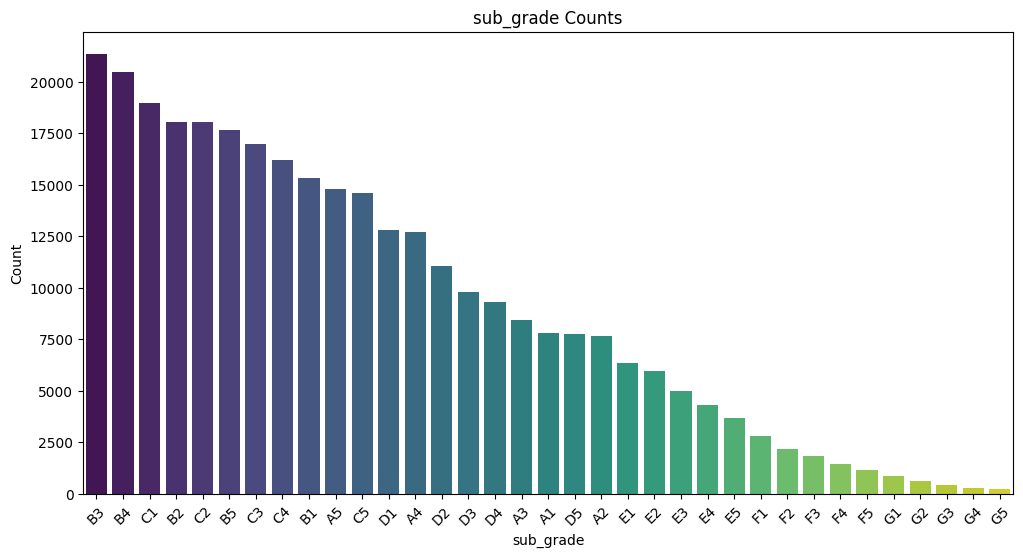

In [64]:
grade_count = train_df['sub_grade'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=grade_count.index, y=grade_count.values, palette='viridis')
plt.title('sub_grade Counts')
plt.xlabel('sub_grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Observations**
* We will use Grade as sub_grade and grade represent the same thing.
* Also grade has lesser categories compared to sub_grade.

**Loan purpose**

In [65]:
train_df['purpose'].value_counts()

purpose
debt_consolidation    187767
credit_card            66568
home_improvement       19207
other                  16942
major_purchase          6964
small_business          4573
car                     3764
medical                 3349
moving                  2254
vacation                1934
house                   1775
wedding                 1414
renewable_energy         251
educational              207
Name: count, dtype: int64

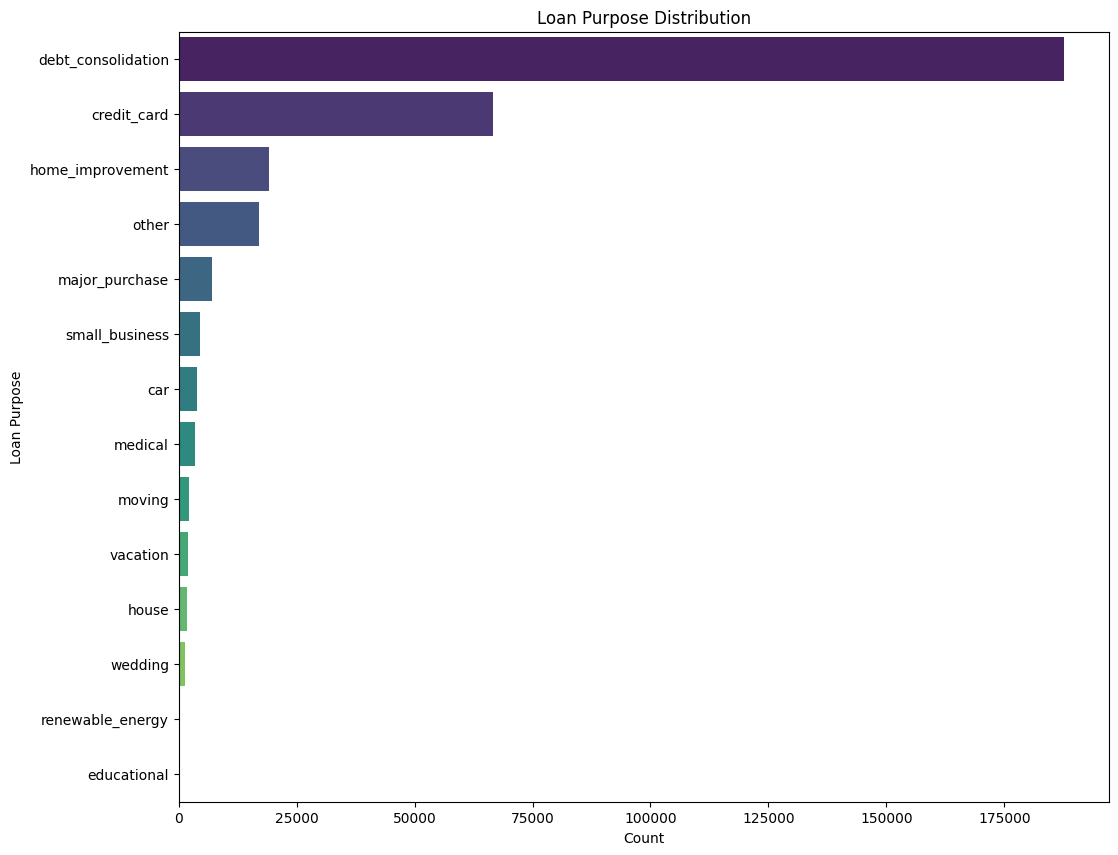

In [66]:
plt.figure(figsize=(12, 10))
sns.countplot(y='purpose', data=train_df, order=train_df['purpose'].value_counts().index, palette='viridis')
plt.title('Loan Purpose Distribution')
plt.xlabel('Count')
plt.ylabel('Loan Purpose')
plt.show()

**Application Type**

In [67]:
train_df['application_type'].value_counts()

application_type
INDIVIDUAL    316391
JOINT            348
DIRECT_PAY       230
Name: count, dtype: int64

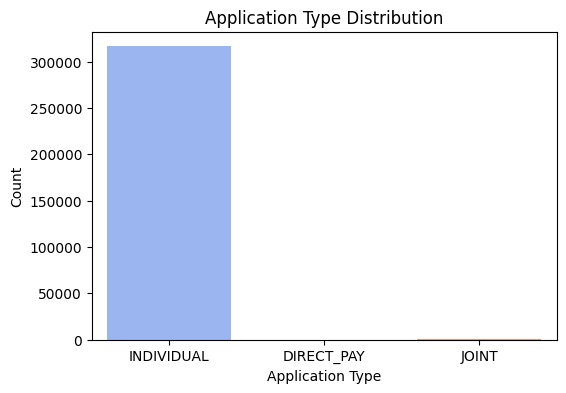

In [68]:
plt.figure(figsize=(6, 4))
sns.countplot(x='application_type', data=train_df, palette='coolwarm')
plt.title('Application Type Distribution')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.show()

# Feature Selection

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316969 entries, 0 to 316969
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   316969 non-null  int64         
 1   loan_amnt                    316969 non-null  float64       
 2   term                         316969 non-null  object        
 3   int_rate                     316969 non-null  float64       
 4   installment                  316969 non-null  float64       
 5   grade                        316969 non-null  object        
 6   sub_grade                    316969 non-null  object        
 7   emp_title                    298572 non-null  object        
 8   emp_length                   316969 non-null  object        
 9   home_ownership               316969 non-null  object        
 10  annual_inc                   316969 non-null  float64       
 11  verification_status          31

In [206]:
features= ['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose',
       'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_to_income', 'total_interest_owed',
       'installment_to_income_ratio', 'active_credit_pct', 'credit_age', 'loan_status']

final_df=train_df[features].copy()
final_df.shape

(316969, 27)

In [207]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316969 entries, 0 to 316969
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    316969 non-null  float64
 1   term                         316969 non-null  object 
 2   int_rate                     316969 non-null  float64
 3   installment                  316969 non-null  float64
 4   grade                        316969 non-null  object 
 5   sub_grade                    316969 non-null  object 
 6   emp_length                   316969 non-null  object 
 7   home_ownership               316969 non-null  object 
 8   annual_inc                   316969 non-null  float64
 9   verification_status          316969 non-null  object 
 10  purpose                      316969 non-null  object 
 11  dti                          316969 non-null  float64
 12  open_acc                     316969 non-null  float64
 13  pub_

In [208]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# for col in final_df.columns:
#     if final_df[col].dtype == 'object' or final_df[col].dtype == 'category':
#         final_df[col] = le.fit_transform(final_df[col])

# final_df.info()

<Axes: >

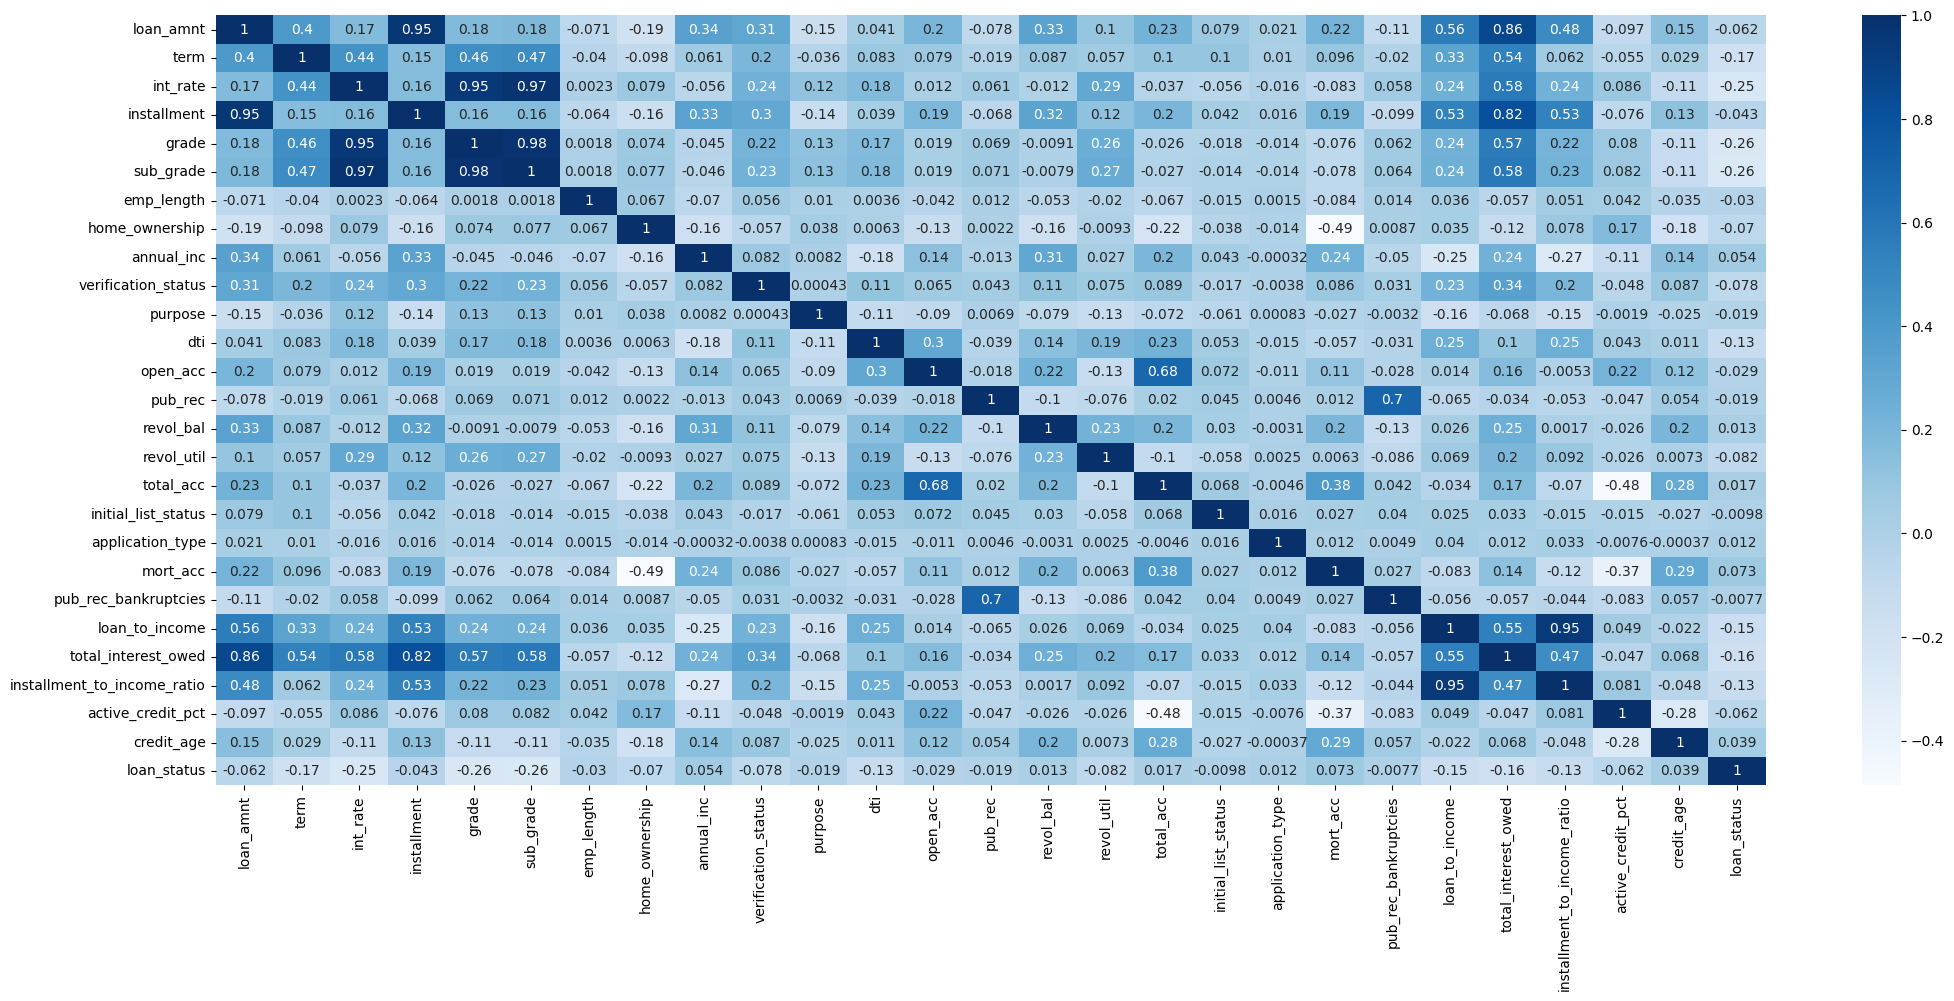

In [72]:
plt.figure(figsize=(25,10))
sns.heatmap(final_df.corr(),annot=True,cmap='Blues')

In [213]:
features= ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose',
       'dti', 'pub_rec', 'revol_bal',
       'revol_util', 'initial_list_status', 'application_type',
       'mort_acc', 'loan_to_income', 'total_interest_owed',
       'installment_to_income_ratio', 'active_credit_pct', 'credit_age', 'loan_status']

model_df=final_df[features].copy()
model_df.shape

(316969, 23)

In [214]:
model_df.isnull().sum()

loan_amnt                        0
term                             0
int_rate                         0
installment                      0
grade                            0
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
purpose                          0
dti                              0
pub_rec                          0
revol_bal                        0
revol_util                     213
initial_list_status              0
application_type                 0
mort_acc                         0
loan_to_income                   0
total_interest_owed              0
installment_to_income_ratio      0
active_credit_pct                0
credit_age                       0
loan_status                      0
dtype: int64

In [215]:
model_df.dropna(subset=['revol_util'],inplace=True)
model_df.isnull().sum()

loan_amnt                      0
term                           0
int_rate                       0
installment                    0
grade                          0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
purpose                        0
dti                            0
pub_rec                        0
revol_bal                      0
revol_util                     0
initial_list_status            0
application_type               0
mort_acc                       0
loan_to_income                 0
total_interest_owed            0
installment_to_income_ratio    0
active_credit_pct              0
credit_age                     0
loan_status                    0
dtype: int64

In [212]:
model_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,initial_list_status,application_type,mort_acc,loan_to_income,total_interest_owed,installment_to_income_ratio,active_credit_pct,credit_age,loan_status
0,6400.0,36 months,15.61,223.78,C,C3,< 1 year,RENT,60000.0,Verified,...,97.6,f,INDIVIDUAL,0.0,0.106667,999.04,0.044756,0.545455,22,Fully Paid
1,25000.0,60 months,19.99,662.21,E,E1,10+ years,MORTGAGE,67000.0,Source Verified,...,42.1,f,INDIVIDUAL,7.0,0.373134,4997.50,0.118605,0.281250,26,Fully Paid
2,15000.0,36 months,5.32,451.73,A,A1,10+ years,MORTGAGE,59000.0,Source Verified,...,23.3,w,INDIVIDUAL,4.0,0.254237,798.00,0.091877,0.521739,27,Fully Paid
3,16000.0,36 months,15.61,559.44,C,C3,< 1 year,RENT,72000.0,Verified,...,79.2,f,INDIVIDUAL,0.0,0.222222,2497.60,0.093240,0.470588,26,Fully Paid
4,8725.0,36 months,12.12,290.30,B,B3,10+ years,MORTGAGE,50000.0,Source Verified,...,45.8,f,INDIVIDUAL,7.0,0.174500,1057.47,0.069672,0.312500,37,Fully Paid


# Model Building

# Set 1

In [216]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316756 entries, 0 to 316969
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    316756 non-null  float64
 1   term                         316756 non-null  object 
 2   int_rate                     316756 non-null  float64
 3   installment                  316756 non-null  float64
 4   grade                        316756 non-null  object 
 5   emp_length                   316756 non-null  object 
 6   home_ownership               316756 non-null  object 
 7   annual_inc                   316756 non-null  float64
 8   verification_status          316756 non-null  object 
 9   purpose                      316756 non-null  object 
 10  dti                          316756 non-null  float64
 11  pub_rec                      316756 non-null  float64
 12  revol_bal                    316756 non-null  float64
 13  revo

In [77]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import torch

**Preventing Data Leakage**

In [283]:
model_df["temp_id"] = range(len(model_df))

X = model_df.drop(columns=['loan_status'])
y = model_df['loan_status']

In [284]:
model_df = model_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [285]:
train_ids, test_ids = train_test_split(
    model_df["temp_id"], test_size=0.2, random_state=42
)

X_train = X.loc[X["temp_id"].isin(train_ids)].drop(columns=['temp_id'])
X_test = X.loc[X["temp_id"].isin(test_ids)].drop(columns=['temp_id'])
y_train = y.loc[X["temp_id"].isin(train_ids)]
y_test = y.loc[X["temp_id"].isin(test_ids)]

In [286]:
overlap_ids = set(train_ids).intersection(set(test_ids))

if len(overlap_ids) == 0:
    print("\n No duplicate IDs found. The split is correct!")
else:
    print(f"\n{len(overlap_ids)} duplicate IDs found")


 No duplicate IDs found. The split is correct!


In [287]:
X.drop(columns=['temp_id'], inplace=True)

In [289]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(scale_pos_weight)

0.2456036074979369


In [290]:
param_distributions = {
    "n_estimators": [int(x) for x in np.linspace(start=100, stop=1500, num=10)],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.01, 0.1, 0.2],
    "reg_alpha": [0, 0.01, 0.1, 1.0],
    "reg_lambda": [0, 0.01, 0.1, 1.0],
}

In [291]:
print("Torch CUDA Available:", torch.cuda.is_available())
print("GPU Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected.")

print("XGBoost GPU Support:", xgb.__version__)

try:
    booster = xgb.Booster({"tree_method": "gpu_hist"})
    print("XGBoost is configured for GPU.")
except xgb.core.XGBoostError:
    print("XGBoost is NOT using GPU.")

Torch CUDA Available: True
GPU Device Name: Tesla P100-PCIE-16GB
XGBoost GPU Support: 2.0.3
XGBoost is configured for GPU.


In [292]:
xgb_clf = xgb.XGBClassifier(
    random_state=42,
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="gpu_hist", 
    gpu_id=0,  
    scale_pos_weight=scale_pos_weight  
)

In [293]:
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_distributions,
    n_iter=30, 
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

In [294]:
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("\n Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Best Parameters: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 722, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}


In [295]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [296]:
accuracy = accuracy_score(y_test, y_pred)
print("\n Model Accuracy:", accuracy)


 Model Accuracy: 0.6720825314698552


In [297]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\n AUC-ROC Score:", roc_auc)


 AUC-ROC Score: 0.7229801042994146


In [298]:
y_train_pred = best_model.predict(X_train)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]

print("\n Train Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n Test Classification Report:\n", classification_report(y_test, y_pred))

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print("\n Train Accuracy:", train_accuracy)
print("\n Test Accuracy:", test_accuracy)

train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n Train AUC-ROC Score:", train_roc_auc)
print("\n Test AUC-ROC Score:", test_roc_auc)


 Train Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.70      0.47     49999
           1       0.90      0.69      0.78    203576

    accuracy                           0.69    253575
   macro avg       0.63      0.69      0.63    253575
weighted avg       0.80      0.69      0.72    253575


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.65      0.43     12337
           1       0.89      0.68      0.77     51057

    accuracy                           0.67     63394
   macro avg       0.61      0.66      0.60     63394
weighted avg       0.78      0.67      0.70     63394


 Train Accuracy: 0.6907857635807947

 Test Accuracy: 0.6720825314698552

 Train AUC-ROC Score: 0.7660162111954464

 Test AUC-ROC Score: 0.7229801042994146


In [299]:
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

grade                          0.368072
sub_grade                      0.161409
term                           0.115583
int_rate                       0.050189
home_ownership                 0.036493
loan_to_income                 0.026375
dti                            0.025901
mort_acc                       0.020691
annual_inc                     0.019111
emp_length                     0.019041
verification_status            0.016844
purpose                        0.014209
installment_to_income_ratio    0.013364
active_credit_pct              0.012602
revol_util                     0.012015
revol_bal                      0.011939
initial_list_status            0.011852
installment                    0.011434
application_type               0.011145
total_interest_owed            0.010781
loan_amnt                      0.010672
credit_age                     0.010252
pub_rec                        0.010026
dtype: float32


# Set 2

In [301]:
model_df["temp_id"] = range(len(model_df))

X = model_df.drop(columns=['loan_status','sub_grade'])
y = model_df['loan_status']

In [302]:
model_df = model_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [303]:
train_ids, test_ids = train_test_split(
    model_df["temp_id"], test_size=0.2, random_state=42
)

X_train = X.loc[X["temp_id"].isin(train_ids)].drop(columns=['temp_id'])
X_test = X.loc[X["temp_id"].isin(test_ids)].drop(columns=['temp_id'])
y_train = y.loc[X["temp_id"].isin(train_ids)]
y_test = y.loc[X["temp_id"].isin(test_ids)]

In [304]:
X.drop(columns=['temp_id'], inplace=True)

In [305]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(scale_pos_weight)

0.24510208290369148


In [306]:
param_distributions = {
    "n_estimators": [int(x) for x in np.linspace(start=100, stop=1500, num=10)],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.01, 0.1, 0.2],
    "reg_alpha": [0, 0.01, 0.1, 1.0],
    "reg_lambda": [0, 0.01, 0.1, 1.0],
}

In [307]:
xgb_clf = xgb.XGBClassifier(
    random_state=42,
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="gpu_hist", 
    gpu_id=0,  
    scale_pos_weight=scale_pos_weight  
)

In [308]:
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_distributions,
    n_iter=30, 
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

In [309]:
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("\n Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Best Parameters: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 722, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}


In [310]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [311]:
accuracy = accuracy_score(y_test, y_pred)
print("\n Model Accuracy:", accuracy)


 Model Accuracy: 0.6671609300564723


In [312]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\n AUC-ROC Score:", roc_auc)


 AUC-ROC Score: 0.7242325983999662


In [313]:
y_train_pred = best_model.predict(X_train)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]

print("\n Train Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n Test Classification Report:\n", classification_report(y_test, y_pred))

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print("\n Train Accuracy:", train_accuracy)
print("\n Test Accuracy:", test_accuracy)

train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n Train AUC-ROC Score:", train_roc_auc)
print("\n Test AUC-ROC Score:", test_roc_auc)


 Train Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.70      0.47     49917
           1       0.90      0.68      0.78    203658

    accuracy                           0.69    253575
   macro avg       0.63      0.69      0.62    253575
weighted avg       0.79      0.69      0.72    253575


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.65      0.43     12419
           1       0.89      0.67      0.76     50975

    accuracy                           0.67     63394
   macro avg       0.61      0.66      0.60     63394
weighted avg       0.78      0.67      0.70     63394


 Train Accuracy: 0.6871891945183871

 Test Accuracy: 0.6671609300564723

 Train AUC-ROC Score: 0.7633675471975522

 Test AUC-ROC Score: 0.7242325983999662


In [314]:
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

grade                          0.405167
term                           0.146969
int_rate                       0.080373
home_ownership                 0.039602
dti                            0.032009
loan_to_income                 0.025398
mort_acc                       0.024680
annual_inc                     0.023508
total_interest_owed            0.023154
emp_length                     0.023125
verification_status            0.020434
installment_to_income_ratio    0.018824
installment                    0.015873
purpose                        0.015779
initial_list_status            0.014802
active_credit_pct              0.014254
revol_bal                      0.013451
revol_util                     0.013047
application_type               0.013024
pub_rec                        0.012718
loan_amnt                      0.012009
credit_age                     0.011801
dtype: float32


# Set 3

In [315]:
model_df["temp_id"] = range(len(model_df))

X = model_df.drop(columns=['loan_status','sub_grade','grade'])
y = model_df['loan_status']

In [316]:
model_df = model_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [317]:
train_ids, test_ids = train_test_split(
    model_df["temp_id"], test_size=0.2, random_state=42
)

X_train = X.loc[X["temp_id"].isin(train_ids)].drop(columns=['temp_id'])
X_test = X.loc[X["temp_id"].isin(test_ids)].drop(columns=['temp_id'])
y_train = y.loc[X["temp_id"].isin(train_ids)]
y_test = y.loc[X["temp_id"].isin(test_ids)]

In [318]:
X.drop(columns=['temp_id'], inplace=True)

In [319]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(scale_pos_weight)

0.24458263596786148


In [320]:
param_distributions = {
    "n_estimators": [int(x) for x in np.linspace(start=100, stop=1500, num=10)],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.01, 0.1, 0.2],
    "reg_alpha": [0, 0.01, 0.1, 1.0],
    "reg_lambda": [0, 0.01, 0.1, 1.0],
}

In [321]:
xgb_clf = xgb.XGBClassifier(
    random_state=42,
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="gpu_hist", 
    gpu_id=0,  
    scale_pos_weight=scale_pos_weight  
)

In [322]:
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_distributions,
    n_iter=30, 
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

In [323]:
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("\n Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Best Parameters: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 722, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}


In [324]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [325]:
accuracy = accuracy_score(y_test, y_pred)
print("\n Model Accuracy:", accuracy)


 Model Accuracy: 0.6638167649935325


In [326]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\n AUC-ROC Score:", roc_auc)


 AUC-ROC Score: 0.7215584170856639


In [327]:
y_train_pred = best_model.predict(X_train)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]

print("\n Train Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n Test Classification Report:\n", classification_report(y_test, y_pred))

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print("\n Train Accuracy:", train_accuracy)
print("\n Test Accuracy:", test_accuracy)

train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n Train AUC-ROC Score:", train_roc_auc)
print("\n Test AUC-ROC Score:", test_roc_auc)


 Train Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.70      0.47     49832
           1       0.90      0.68      0.77    203743

    accuracy                           0.68    253575
   macro avg       0.63      0.69      0.62    253575
weighted avg       0.79      0.68      0.71    253575


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.66      0.44     12504
           1       0.89      0.67      0.76     50890

    accuracy                           0.66     63394
   macro avg       0.61      0.66      0.60     63394
weighted avg       0.78      0.66      0.70     63394


 Train Accuracy: 0.6825988366361038

 Test Accuracy: 0.6638167649935325

 Train AUC-ROC Score: 0.7603507825657524

 Test AUC-ROC Score: 0.7215584170856639


In [328]:
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

term                           0.406002
int_rate                       0.143931
home_ownership                 0.056185
total_interest_owed            0.043594
dti                            0.036712
annual_inc                     0.036387
loan_to_income                 0.028784
mort_acc                       0.025450
verification_status            0.023739
emp_length                     0.022378
installment_to_income_ratio    0.022359
purpose                        0.018057
active_credit_pct              0.017007
revol_util                     0.016928
loan_amnt                      0.016409
installment                    0.015489
application_type               0.014658
revol_bal                      0.014646
pub_rec                        0.014078
initial_list_status            0.014047
credit_age                     0.013158
dtype: float32


# Set 4

In [329]:
model_df["temp_id"] = range(len(model_df))

X = model_df.drop(columns=['loan_status','sub_grade','grade','term'])
y = model_df['loan_status']

In [376]:
X.columns

Index(['int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'pub_rec', 'revol_bal',
       'revol_util', 'initial_list_status', 'application_type', 'mort_acc',
       'loan_to_income', 'total_interest_owed', 'installment_to_income_ratio',
       'active_credit_pct', 'credit_age'],
      dtype='object')

In [330]:
model_df = model_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [331]:
train_ids, test_ids = train_test_split(
    model_df["temp_id"], test_size=0.2, random_state=42
)

X_train = X.loc[X["temp_id"].isin(train_ids)].drop(columns=['temp_id'])
X_test = X.loc[X["temp_id"].isin(test_ids)].drop(columns=['temp_id'])
y_train = y.loc[X["temp_id"].isin(train_ids)]
y_test = y.loc[X["temp_id"].isin(test_ids)]

In [332]:
X.drop(columns=['temp_id'], inplace=True)

In [333]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(scale_pos_weight)

0.24480869488380314


In [334]:
param_distributions = {
    "n_estimators": [int(x) for x in np.linspace(start=100, stop=1500, num=10)],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.01, 0.1, 0.2],
    "reg_alpha": [0, 0.01, 0.1, 1.0],
    "reg_lambda": [0, 0.01, 0.1, 1.0],
}

In [335]:
xgb_clf = xgb.XGBClassifier(
    random_state=42,
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="gpu_hist", 
    gpu_id=0,  
    scale_pos_weight=scale_pos_weight  
)

In [336]:
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_distributions,
    n_iter=30, 
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

In [337]:
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("\n Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Best Parameters: {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 722, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.6}


In [338]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [339]:
accuracy = accuracy_score(y_test, y_pred)
print("\n Model Accuracy:", accuracy)


 Model Accuracy: 0.6623497491876202


In [340]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\n AUC-ROC Score:", roc_auc)


 AUC-ROC Score: 0.7236554335558506


In [341]:
y_train_pred = best_model.predict(X_train)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]

print("\n Train Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n Test Classification Report:\n", classification_report(y_test, y_pred))

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print("\n Train Accuracy:", train_accuracy)
print("\n Test Accuracy:", test_accuracy)

train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n Train AUC-ROC Score:", train_roc_auc)
print("\n Test AUC-ROC Score:", test_roc_auc)


 Train Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.70      0.46     49869
           1       0.90      0.68      0.77    203706

    accuracy                           0.68    253575
   macro avg       0.62      0.69      0.62    253575
weighted avg       0.79      0.68      0.71    253575


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.66      0.43     12467
           1       0.89      0.66      0.76     50927

    accuracy                           0.66     63394
   macro avg       0.61      0.66      0.60     63394
weighted avg       0.78      0.66      0.70     63394


 Train Accuracy: 0.680954352755595

 Test Accuracy: 0.6623497491876202

 Train AUC-ROC Score: 0.7596250778455319

 Test AUC-ROC Score: 0.7236554335558506


In [342]:
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

int_rate                       0.241864
total_interest_owed            0.104634
home_ownership                 0.074116
dti                            0.060539
annual_inc                     0.058111
loan_to_income                 0.051646
verification_status            0.050164
installment                    0.039376
emp_length                     0.037386
mort_acc                       0.034838
initial_list_status            0.029050
purpose                        0.028954
loan_amnt                      0.028294
installment_to_income_ratio    0.026426
active_credit_pct              0.024329
revol_util                     0.023748
revol_bal                      0.023549
pub_rec                        0.022743
credit_age                     0.021920
application_type               0.018314
dtype: float32


# Set 5

In [343]:
model_df["temp_id"] = range(len(model_df))

X = model_df.drop(columns=['loan_status','sub_grade','grade','loan_amnt','term'])
y = model_df['loan_status']

In [344]:
model_df = model_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [345]:
train_ids, test_ids = train_test_split(
    model_df["temp_id"], test_size=0.2, random_state=42
)

X_train = X.loc[X["temp_id"].isin(train_ids)].drop(columns=['temp_id'])
X_test = X.loc[X["temp_id"].isin(test_ids)].drop(columns=['temp_id'])
y_train = y.loc[X["temp_id"].isin(train_ids)]
y_test = y.loc[X["temp_id"].isin(test_ids)]

In [346]:
X.drop(columns=['temp_id'], inplace=True)

In [347]:
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(scale_pos_weight)

0.24394156430281386


In [348]:
param_distributions = {
    "n_estimators": [int(x) for x in np.linspace(start=100, stop=1500, num=10)],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.01, 0.1, 0.2],
    "reg_alpha": [0, 0.01, 0.1, 1.0],
    "reg_lambda": [0, 0.01, 0.1, 1.0],
}

In [349]:
xgb_clf = xgb.XGBClassifier(
    random_state=42,
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="gpu_hist", 
    gpu_id=0,  
    scale_pos_weight=scale_pos_weight  
)

In [350]:
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_distributions,
    n_iter=30, 
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

In [351]:
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("\n Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.01, 'n_estimators': 722, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [352]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [353]:
accuracy = accuracy_score(y_test, y_pred)
print("\n Model Accuracy:", accuracy)


 Model Accuracy: 0.659605009937849


In [354]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\n AUC-ROC Score:", roc_auc)


 AUC-ROC Score: 0.718626860377879


In [355]:
y_train_pred = best_model.predict(X_train)
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]

print("\n Train Classification Report:\n", classification_report(y_train, y_train_pred))

print("\n Test Classification Report:\n", classification_report(y_test, y_pred))

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print("\n Train Accuracy:", train_accuracy)
print("\n Test Accuracy:", test_accuracy)

train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n Train AUC-ROC Score:", train_roc_auc)
print("\n Test AUC-ROC Score:", test_roc_auc)


 Train Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.69      0.45     49727
           1       0.90      0.66      0.76    203848

    accuracy                           0.67    253575
   macro avg       0.62      0.68      0.61    253575
weighted avg       0.79      0.67      0.70    253575


 Test Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.66      0.44     12609
           1       0.89      0.66      0.76     50785

    accuracy                           0.66     63394
   macro avg       0.61      0.66      0.60     63394
weighted avg       0.78      0.66      0.69     63394


 Train Accuracy: 0.6684176279207336

 Test Accuracy: 0.659605009937849

 Train AUC-ROC Score: 0.742796458171447

 Test AUC-ROC Score: 0.718626860377879


In [356]:
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

int_rate                       0.305028
loan_to_income                 0.092569
home_ownership                 0.077036
verification_status            0.073674
dti                            0.073309
emp_length                     0.047610
mort_acc                       0.040934
initial_list_status            0.039018
annual_inc                     0.029944
total_interest_owed            0.026264
installment                    0.025731
active_credit_pct              0.025599
purpose                        0.024116
revol_bal                      0.022070
installment_to_income_ratio    0.021330
revol_util                     0.019508
application_type               0.019349
credit_age                     0.018758
pub_rec                        0.018154
dtype: float32


# Prediction Data

# Set 1


 No duplicate IDs found. The split is correct!
0.24455209376288356

 Model Accuracy: 0.6641164779001167

 AUC-ROC Score: 0.7270225875612657

 Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.67      0.44     12509
           1       0.89      0.66      0.76     50885

    accuracy                           0.66     63394
   macro avg       0.61      0.67      0.60     63394
weighted avg       0.78      0.66      0.70     63394



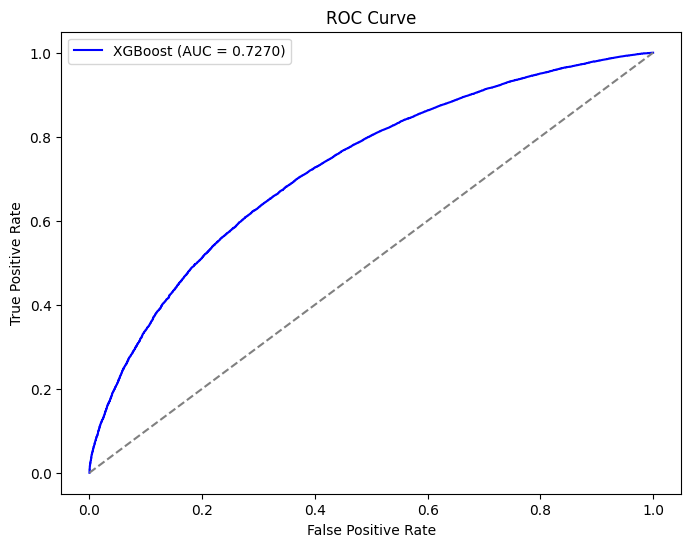


 Feature Importance:
 grade                          0.362113
sub_grade                      0.243536
term                           0.085770
loan_to_income                 0.051451
home_ownership                 0.039633
dti                            0.033166
annual_inc                     0.022032
emp_length                     0.020609
mort_acc                       0.020519
verification_status            0.012340
int_rate                       0.011657
active_credit_pct              0.010651
purpose                        0.009268
initial_list_status            0.009053
revol_util                     0.008780
installment                    0.008684
revol_bal                      0.008280
installment_to_income_ratio    0.007970
application_type               0.007700
pub_rec                        0.007402
credit_age                     0.006825
loan_amnt                      0.006550
total_interest_owed            0.006013
dtype: float32


In [462]:
from sklearn.metrics import roc_auc_score, roc_curve

model_df["temp_id"] = range(len(model_df))

X = model_df.drop(columns=['loan_status'])
y = model_df['loan_status']

model_df = model_df.sample(frac=1, random_state=42).reset_index(drop=True)

train_ids, test_ids = train_test_split(
    model_df["temp_id"], test_size=0.2, random_state=42
)

X_train = X.loc[X["temp_id"].isin(train_ids)].drop(columns=['temp_id'])
X_test = X.loc[X["temp_id"].isin(test_ids)].drop(columns=['temp_id'])
y_train = y.loc[X["temp_id"].isin(train_ids)]
y_test = y.loc[X["temp_id"].isin(test_ids)]

overlap_ids = set(train_ids).intersection(set(test_ids))

if len(overlap_ids) == 0:
    print("\n No duplicate IDs found. The split is correct!")
else:
    print(f"\n{len(overlap_ids)} duplicate IDs found")

X.drop(columns=['temp_id'], inplace=True)

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(scale_pos_weight)

# set1_model = xgb.XGBClassifier(
#     random_state=42,
#     objective="binary:logistic",
#     eval_metric="auc",
#     tree_method="gpu_hist",
#     gpu_id=0,
#     scale_pos_weight=scale_pos_weight,
#     subsample=1.0,
#     reg_lambda=0,
#     reg_alpha=0.1,
#     n_estimators=722,
#     max_depth=5,
#     learning_rate=0.05,
#     gamma=0.2,
#     colsample_bytree=0.6
# )

set1_model = xgb.XGBClassifier(
    random_state=42,
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="gpu_hist",
    gpu_id=0,
    scale_pos_weight=scale_pos_weight,  # Keep your calculated value unchanged
    subsample=0.8,              # Use 80% of data per boosting round (increases randomness)
    colsample_bytree=1.0,         # Use all features in each tree so that no feature is consistently left out
    reg_lambda=3.0,             # Increase L2 regularization to penalize complex splits
    reg_alpha=3.0,              # Increase L1 regularization to force sparsity
    n_estimators=800,           # Increase boosting rounds for gradual refinement
    max_depth=3,                # Reduce maximum tree depth to prevent overfitting on dominant features
    min_child_weight=5,         # Increase min child weight to require more observations in a split
    learning_rate=0.05,         # Lower learning rate for more gradual learning
    gamma=0.5                   # Increase gamma to allow splits only with substantial gain
)


set1_model.fit(X_train, y_train)

y_pred = set1_model.predict(X_test)
y_pred_proba = set1_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n Model Accuracy:", accuracy)
print("\n AUC-ROC Score:", roc_auc)
print("\n Classification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

feature_importance = pd.Series(set1_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n Feature Importance:\n", feature_importance)

In [428]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'pub_rec', 'revol_bal', 'revol_util',
       'initial_list_status', 'application_type', 'mort_acc', 'loan_to_income',
       'total_interest_owed', 'installment_to_income_ratio',
       'active_credit_pct', 'credit_age'],
      dtype='object')

In [443]:
y_train.value_counts(normalize=True)

loan_status
1    0.80394
0    0.19606
Name: proportion, dtype: float64

In [430]:
y_test.value_counts(normalize=True)

loan_status
1    0.804035
0    0.195965
Name: proportion, dtype: float64

# LightGBM


 No duplicate IDs found. The split is correct!
scale_pos_weight: 0.24477203110273327
[LightGBM] [Info] Number of positive: 203712, number of negative: 49863
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2981
[LightGBM] [Info] Number of data points in the train set: 253575, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.803360 -> initscore=1.407428
[LightGBM] [Info] Start training from score 1.407428
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

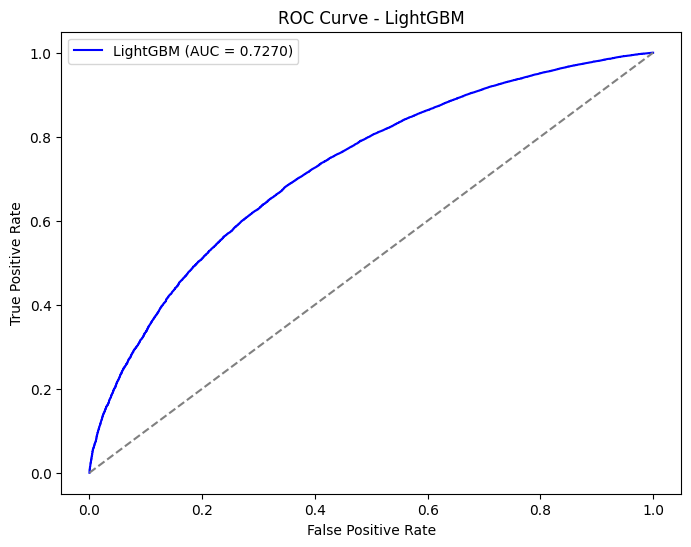


 Feature Importance:
 revol_util                     2731
revol_bal                      2651
int_rate                       2625
dti                            2484
active_credit_pct              2412
annual_inc                     2097
installment_to_income_ratio    1770
credit_age                     1756
loan_to_income                 1754
installment                    1606
total_interest_owed            1512
sub_grade                      1507
loan_amnt                      1388
mort_acc                       1327
purpose                         966
emp_length                      939
pub_rec                         382
home_ownership                  370
verification_status             314
term                            206
grade                           156
initial_list_status             138
application_type                 81
dtype: int32


In [472]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

model_df["temp_id"] = range(len(model_df))

X = model_df.drop(columns=['loan_status'])
y = model_df['loan_status']

model_df = model_df.sample(frac=1, random_state=42).reset_index(drop=True)

train_ids, test_ids = train_test_split(
    model_df["temp_id"], test_size=0.2, random_state=42
)

X_train = X.loc[X["temp_id"].isin(train_ids)].drop(columns=['temp_id'])
X_test  = X.loc[X["temp_id"].isin(test_ids)].drop(columns=['temp_id'])
y_train = y.loc[X["temp_id"].isin(train_ids)]
y_test  = y.loc[X["temp_id"].isin(test_ids)]

overlap_ids = set(train_ids).intersection(set(test_ids))
if len(overlap_ids) == 0:
    print("\n No duplicate IDs found. The split is correct!")
else:
    print(f"\n{len(overlap_ids)} duplicate IDs found")

X.drop(columns=['temp_id'], inplace=True)


scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print("scale_pos_weight:", scale_pos_weight)

lgb_model = LGBMClassifier(
    random_state=42,
    objective="binary",
    n_estimators=400,           # Increase boosting rounds
    max_depth=10,                 # Allow deeper trees
    num_leaves=60,               # More leaves for complex splits
    learning_rate=0.04,          # Lower learning rate for smoother convergence
    subsample=0.95,              # Use 95% of data per boosting round
    colsample_bytree=0.8,        # Use 80% of features per tree for diversity
    reg_alpha=0.3,               # Lower L1 regularization
    reg_lambda=0.8,              # Lower L2 regularization
    min_child_samples=25,        # Require more samples per leaf to avoid noisy splits
    min_split_gain=0.1,          # Allow splits with lower gain if they capture additional nuance
    scale_pos_weight=scale_pos_weight  # Keep computed imbalance weight unchanged
)

lgb_set1.fit(X_train, y_train)

y_pred = lgb_set1.predict(X_test)
y_pred_proba = lgb_set1.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n Model Accuracy:", accuracy)
print("\n AUC-ROC Score:", roc_auc)
print("\n Classification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'LightGBM (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend()
plt.show()

feature_importance = pd.Series(lgb_set1.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n Feature Importance:\n", feature_importance)

In [431]:
prediction_df = pd.read_csv('/kaggle/input/rocket-companies/test (1).csv')
prediction_df.shape

(79060, 27)

In [432]:
# Loan to income
prediction_df['loan_to_income'] = prediction_df['loan_amnt'] / prediction_df['annual_inc']
# Total interest owed
prediction_df['total_interest_owed'] = prediction_df['loan_amnt'] * (prediction_df['int_rate'] / 100)
# Installment to income ratio
prediction_df['installment_to_income_ratio'] = prediction_df['installment'] / (prediction_df['annual_inc'] / 12)
# Active Credit Accounts pct
prediction_df['active_credit_pct'] = prediction_df.apply(lambda row: row['open_acc'] / row['total_acc']
                                                 if row['total_acc'] > 0 else np.nan, axis=1)
# Credit Age
prediction_df['earliest_cr_line'] = pd.to_datetime(prediction_df['earliest_cr_line'], errors='coerce')
current_year = pd.Timestamp('now').year
prediction_df['credit_age'] = current_year - prediction_df['earliest_cr_line'].dt.year
# Employee Length
prediction_df['emp_length'].fillna('Unknown',inplace=True)

In [433]:
for col in final_pred_df.columns:
    if final_pred_df[col].dtype == 'object' or final_pred_df[col].dtype == 'category':
        final_pred_df[col] = le.fit_transform(final_pred_df[col])

final_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79060 entries, 0 to 79059
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    79060 non-null  float64
 1   term                         79060 non-null  int64  
 2   int_rate                     79060 non-null  float64
 3   installment                  79060 non-null  float64
 4   grade                        79060 non-null  int64  
 5   sub_grade                    79060 non-null  int64  
 6   emp_length                   79060 non-null  int64  
 7   home_ownership               79060 non-null  int64  
 8   annual_inc                   79060 non-null  float64
 9   verification_status          79060 non-null  int64  
 10  purpose                      79060 non-null  int64  
 11  dti                          79060 non-null  float64
 12  open_acc                     79060 non-null  float64
 13  pub_rec         

In [434]:
set_1_features = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'pub_rec', 'revol_bal', 'revol_util',
       'initial_list_status', 'application_type', 'mort_acc', 'loan_to_income',
       'total_interest_owed', 'installment_to_income_ratio',
       'active_credit_pct', 'credit_age']

X_pred = final_pred_df[set_1_features].copy()
X_pred.shape

(79060, 23)

In [470]:
y_pred = set1_model.predict(X_pred)
y_pred_proba = set1_model.predict_proba(X_pred)[:, 1]

In [471]:
data_counter = Counter(y_pred)
total = sum(data_counter.values())
percentages = {key: (value / total) * 100 for key, value in data_counter.items()}
print(percentages)

{1: 60.03415127751075, 0: 39.96584872248925}


In [468]:
# LightGBM Prediction

y_pred = lgb_set1.predict(X_pred)
y_pred_proba = lgb_set1.predict_proba(X_pred)[:, 1]
data_counter = Counter(y_pred)
total = sum(data_counter.values())
percentages = {key: (value / total) * 100 for key, value in data_counter.items()}
print(percentages)

{1: 61.78598532759929, 0: 38.21401467240071}


# Set 5

In [364]:
prediction_df = pd.read_csv('/kaggle/input/rocket-companies/test (1).csv')
prediction_df.shape

(79060, 27)

In [365]:
prediction_df.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,0,14000.0,36 months,11.14,459.28,B,B2,Frederick's of Hollywood,10+ years,RENT,...,11.0,0.0,35366.0,48.1,23.0,w,INDIVIDUAL,0.0,0.0,"050 Charles Stream Suite 336\r\nNew Jerryland,..."
1,1,10000.0,36 months,12.99,336.90,B,B5,Parts Sales,3 years,MORTGAGE,...,6.0,1.0,6073.0,65.3,12.0,f,INDIVIDUAL,0.0,1.0,"1212 Pitts Oval\r\nMeyermouth, OH 22690"
2,2,6000.0,36 months,11.67,198.35,B,B4,secretary,10+ years,RENT,...,18.0,1.0,4926.0,39.4,49.0,f,INDIVIDUAL,6.0,1.0,"0843 Price Creek Suite 444\r\nThomashaven, WA ..."
3,3,6500.0,36 months,15.59,227.21,D,D1,Dental Assistant,2 years,RENT,...,11.0,0.0,3100.0,50.0,22.0,w,INDIVIDUAL,0.0,0.0,"27041 Angela Forges Suite 641\r\nWelchmouth, O..."
4,4,9500.0,36 months,12.12,316.09,B,B3,Wake County Public Schools,9 years,RENT,...,9.0,0.0,19246.0,57.8,26.0,f,INDIVIDUAL,0.0,0.0,"PSC 4021, Box 3568\r\nAPO AP 22690"


# Prediction Feature Building

# Set 5

In [369]:
prediction_df.isnull().sum()

Unnamed: 0                 0
loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               4529
emp_length              3625
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
purpose                    0
title                    359
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                63
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                7578
pub_rec_bankruptcies     105
address                    0
loan_to_income             0
dtype: int64

In [370]:
# Loan to income
prediction_df['loan_to_income'] = prediction_df['loan_amnt'] / prediction_df['annual_inc']
# Total interest owed
prediction_df['total_interest_owed'] = prediction_df['loan_amnt'] * (prediction_df['int_rate'] / 100)
# Installment to income ratio
prediction_df['installment_to_income_ratio'] = prediction_df['installment'] / (prediction_df['annual_inc'] / 12)
# Active Credit Accounts pct
prediction_df['active_credit_pct'] = prediction_df.apply(lambda row: row['open_acc'] / row['total_acc']
                                                 if row['total_acc'] > 0 else np.nan, axis=1)
# Credit Age
prediction_df['earliest_cr_line'] = pd.to_datetime(prediction_df['earliest_cr_line'], errors='coerce')
current_year = pd.Timestamp('now').year
prediction_df['credit_age'] = current_year - prediction_df['earliest_cr_line'].dt.year
# Employee Length
prediction_df['emp_length'].fillna('Unknown',inplace=True)


In [371]:
features= ['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose',
       'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_to_income', 'total_interest_owed',
       'installment_to_income_ratio', 'active_credit_pct', 'credit_age']

final_pred_df=prediction_df[features].copy()
final_pred_df.shape

(79060, 26)

In [372]:
final_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79060 entries, 0 to 79059
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    79060 non-null  float64
 1   term                         79060 non-null  object 
 2   int_rate                     79060 non-null  float64
 3   installment                  79060 non-null  float64
 4   grade                        79060 non-null  object 
 5   sub_grade                    79060 non-null  object 
 6   emp_length                   79060 non-null  object 
 7   home_ownership               79060 non-null  object 
 8   annual_inc                   79060 non-null  float64
 9   verification_status          79060 non-null  object 
 10  purpose                      79060 non-null  object 
 11  dti                          79060 non-null  float64
 12  open_acc                     79060 non-null  float64
 13  pub_rec         

In [373]:
for col in final_pred_df.columns:
    if final_pred_df[col].dtype == 'object' or final_pred_df[col].dtype == 'category':
        final_pred_df[col] = le.fit_transform(final_pred_df[col])

final_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79060 entries, 0 to 79059
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    79060 non-null  float64
 1   term                         79060 non-null  int64  
 2   int_rate                     79060 non-null  float64
 3   installment                  79060 non-null  float64
 4   grade                        79060 non-null  int64  
 5   sub_grade                    79060 non-null  int64  
 6   emp_length                   79060 non-null  int64  
 7   home_ownership               79060 non-null  int64  
 8   annual_inc                   79060 non-null  float64
 9   verification_status          79060 non-null  int64  
 10  purpose                      79060 non-null  int64  
 11  dti                          79060 non-null  float64
 12  open_acc                     79060 non-null  float64
 13  pub_rec         


 No duplicate IDs found. The split is correct!
scale_pos_weight: 0.24496148388902253
[LightGBM] [Info] Number of positive: 203681, number of negative: 49894
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2947
[LightGBM] [Info] Number of data points in the train set: 253575, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.803238 -> initscore=1.406654
[LightGBM] [Info] Start training from score 1.406654
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

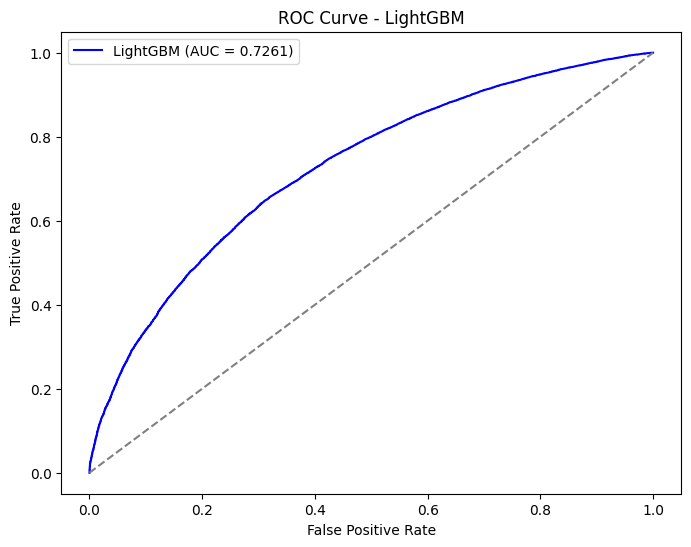


 Feature Importance:
 int_rate                       3233
revol_util                     2878
revol_bal                      2721
dti                            2687
active_credit_pct              2441
annual_inc                     2250
credit_age                     1908
loan_to_income                 1824
installment_to_income_ratio    1712
mort_acc                       1479
total_interest_owed            1464
installment                    1442
loan_amnt                      1386
purpose                        1023
emp_length                      895
grade                           532
home_ownership                  346
pub_rec                         324
verification_status             311
term                            212
initial_list_status              89
application_type                 84
dtype: int32


In [473]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

model_df["temp_id"] = range(len(model_df))

X = model_df.drop(columns=['loan_status','sub_grade'])
y = model_df['loan_status']

model_df = model_df.sample(frac=1, random_state=42).reset_index(drop=True)

train_ids, test_ids = train_test_split(
    model_df["temp_id"], test_size=0.2, random_state=42
)

X_train = X.loc[X["temp_id"].isin(train_ids)].drop(columns=['temp_id'])
X_test  = X.loc[X["temp_id"].isin(test_ids)].drop(columns=['temp_id'])
y_train = y.loc[X["temp_id"].isin(train_ids)]
y_test  = y.loc[X["temp_id"].isin(test_ids)]

overlap_ids = set(train_ids).intersection(set(test_ids))
if len(overlap_ids) == 0:
    print("\n No duplicate IDs found. The split is correct!")
else:
    print(f"\n{len(overlap_ids)} duplicate IDs found")

X.drop(columns=['temp_id'], inplace=True)


scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print("scale_pos_weight:", scale_pos_weight)

lgb_model = LGBMClassifier(
    random_state=42,
    objective="binary",
    n_estimators=400,           # Increase boosting rounds
    max_depth=10,                 # Allow deeper trees
    num_leaves=60,               # More leaves for complex splits
    learning_rate=0.04,          # Lower learning rate for smoother convergence
    subsample=0.95,              # Use 95% of data per boosting round
    colsample_bytree=0.8,        # Use 80% of features per tree for diversity
    reg_alpha=0.3,               # Lower L1 regularization
    reg_lambda=0.8,              # Lower L2 regularization
    min_child_samples=25,        # Require more samples per leaf to avoid noisy splits
    min_split_gain=0.1,          # Allow splits with lower gain if they capture additional nuance
    scale_pos_weight=scale_pos_weight  # Keep computed imbalance weight unchanged
)

lgb_set1.fit(X_train, y_train)

y_pred = lgb_set1.predict(X_test)
y_pred_proba = lgb_set1.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n Model Accuracy:", accuracy)
print("\n AUC-ROC Score:", roc_auc)
print("\n Classification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'LightGBM (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend()
plt.show()

feature_importance = pd.Series(lgb_set1.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n Feature Importance:\n", feature_importance)

In [377]:
set_4_features = ['int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'pub_rec', 'revol_bal',
       'revol_util', 'initial_list_status', 'application_type', 'mort_acc',
       'loan_to_income', 'total_interest_owed', 'installment_to_income_ratio',
       'active_credit_pct', 'credit_age']

X_pred = final_pred_df[set_4_features].copy()

In [378]:
y_pred = best_model.predict(X_pred)
y_pred_proba = best_model.predict_proba(X_pred)[:, 1]

In [380]:
from collections import Counter

print("Predicted Class Distribution:", Counter(y_pred))

Predicted Class Distribution: Counter({1: 47211, 0: 31849})


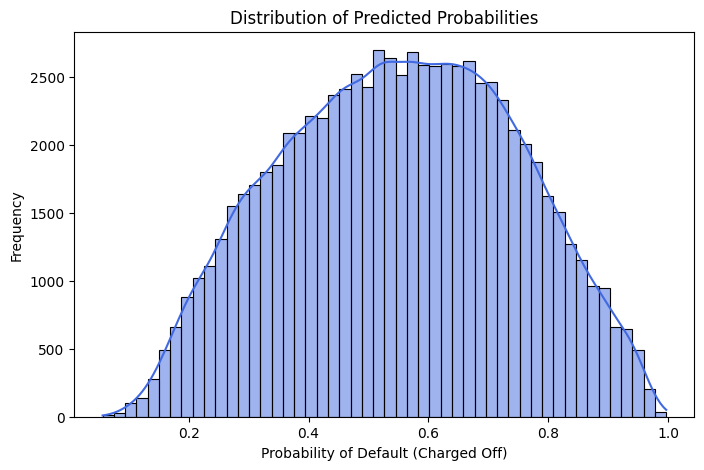

In [381]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_proba, bins=50, kde=True, color='royalblue')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability of Default (Charged Off)')
plt.ylabel('Frequency')
plt.show()

In [217]:
model_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'pub_rec', 'revol_bal', 'revol_util', 'initial_list_status',
       'application_type', 'mort_acc', 'loan_to_income', 'total_interest_owed',
       'installment_to_income_ratio', 'active_credit_pct', 'credit_age',
       'loan_status'],
      dtype='object')

Categorical columns: []
scale_pos_weight: 0.24384102254487622
[LightGBM] [Info] Number of positive: 203727, number of negative: 49677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2946
[LightGBM] [Info] Number of data points in the train set: 253404, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.803961 -> initscore=1.411239
[LightGBM] [Info] Start training from score 1.411239

Train Accuracy: 0.6900640873861502

Train AUC-ROC Score: 0.7673806496842032

Train Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.71      0.47     49677
           1       0.91      0.69      0.78    203727

    accuracy                           0.69    253404
   macro avg       0.63      0.70      0.63    253404


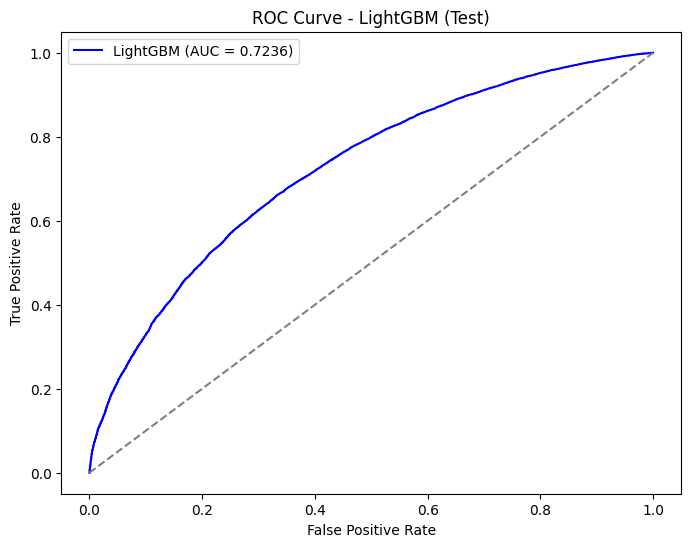


Feature Importance:
 dti                            2302
int_rate                       2281
revol_util                     2016
active_credit_pct              1921
revol_bal                      1845
annual_inc                     1599
credit_age                     1379
loan_to_income                 1341
installment_to_income_ratio    1316
installment                    1255
total_interest_owed            1130
loan_amnt                      1063
emp_length                      872
purpose                         786
mort_acc                        689
grade                           440
home_ownership                  355
verification_status             336
pub_rec                         308
term                            222
initial_list_status              82
application_type                 62
dtype: int32


In [220]:
cat_cols = model_df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)
for col in cat_cols:
    model_df[col] = model_df[col].astype('category')

X = model_df.drop(columns=['loan_status'])
y = model_df['loan_status'].cat.codes  

model_df["temp_id"] = range(len(model_df))
X["temp_id"] = model_df["temp_id"]

model_df = model_df.sample(frac=1, random_state=42).reset_index(drop=True)
train_ids, test_ids = train_test_split(model_df["temp_id"], test_size=0.2, random_state=42)

X_train = X.loc[X["temp_id"].isin(train_ids)].drop(columns=['temp_id'])
X_test  = X.loc[X["temp_id"].isin(test_ids)].drop(columns=['temp_id'])
y_train = y.loc[X["temp_id"].isin(train_ids)]
y_test  = y.loc[X["temp_id"].isin(test_ids)]
X.drop(columns=['temp_id'], inplace=True)

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print("scale_pos_weight:", scale_pos_weight)

lgb_model = LGBMClassifier(
    random_state=42,
    objective="binary",
    n_estimators=400,           # Number of boosting rounds
    max_depth=10,               # Allow deeper trees
    num_leaves=60,              # More leaves for complex splits
    learning_rate=0.04,          # Lower learning rate for smoother convergence
    subsample=0.95,             # Use 95% of data per boosting round
    colsample_bytree=0.8,       # Use 80% of features per tree
    reg_alpha=0.3,              # L1 regularization
    reg_lambda=0.8,             # L2 regularization
    min_child_samples=25,       # Minimum samples per leaf to avoid noisy splits
    min_split_gain=0.1,         # Minimum gain required to make a split
    scale_pos_weight=scale_pos_weight  # Use computed imbalance weight unchanged
)

lgb_model.fit(X_train, y_train, categorical_feature=cat_cols)

y_train_pred = lgb_model.predict(X_train)
y_train_pred_proba = lgb_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)

print("\nTrain Accuracy:", train_accuracy)
print("\nTrain AUC-ROC Score:", train_roc_auc)
print("\nTrain Classification Report:\n", classification_report(y_train, y_train_pred))

y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nTest Accuracy:", test_accuracy)
print("\nTest AUC-ROC Score:", test_roc_auc)
print("\nTest Classification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'LightGBM (AUC = {test_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM (Test)')
plt.legend()
plt.show()

feature_importance = pd.Series(lgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:\n", feature_importance)

# Approach 2 Segmenting into 3 based on Annual_Inc

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [83]:
def train_model_on_group(df, group_name):
    # Create a working copy of the dataframe for this group
    data = df.copy()
    
    # Create a temporary ID column to facilitate splitting
    data["temp_id"] = range(len(data))
    
    # Separate features and target
    X = data.drop(columns=['loan_status', 'sub_grade'])
    y = data['loan_status']
    
    # Shuffle the data before splitting
    data = data.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Split temp_id into training and testing sets (80/20 split)
    train_ids, test_ids = train_test_split(data["temp_id"], test_size=0.2, random_state=42)
    
    # Create training and testing datasets based on temp_id
    X_train = X.loc[X["temp_id"].isin(train_ids)].drop(columns=['temp_id'])
    X_test  = X.loc[X["temp_id"].isin(test_ids)].drop(columns=['temp_id'])
    y_train = y.loc[X["temp_id"].isin(train_ids)]
    y_test  = y.loc[X["temp_id"].isin(test_ids)]
    
    # Validate that there are no duplicate IDs in the splits
    overlap_ids = set(train_ids).intersection(set(test_ids))
    if len(overlap_ids) == 0:
        print(f"\nNo duplicate IDs found in {group_name} split. The split is correct!")
    else:
        print(f"\n{len(overlap_ids)} duplicate IDs found in {group_name} split!")
    
    # Remove the temporary ID from X (if it still exists)
    if "temp_id" in X.columns:
        X.drop(columns=['temp_id'], inplace=True)
    
    # Calculate the scale_pos_weight to handle class imbalance for this group
    scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
    print(f"\nScale_pos_weight for {group_name}: {scale_pos_weight:.4f}")
    
    # Initialize the LightGBM model using the provided hyperparameters
    lgb_model = LGBMClassifier(
        random_state=42,
        objective="binary",
        n_estimators=400,           # Increase boosting rounds
        max_depth=10,               # Allow deeper trees
        num_leaves=60,              # More leaves for complex splits
        learning_rate=0.04,         # Lower learning rate for smoother convergence
        subsample=0.95,             # Use 95% of data per boosting round
        colsample_bytree=0.8,       # Use 80% of features per tree for diversity
        reg_alpha=0.3,              # Lower L1 regularization
        reg_lambda=0.8,             # Lower L2 regularization
        min_child_samples=25,       # Require more samples per leaf to avoid noisy splits
        min_split_gain=0.1,         # Allow splits with lower gain if they capture additional nuance
        scale_pos_weight=scale_pos_weight
    )
    
    # Fit the model on the training data
    lgb_model.fit(X_train, y_train)
    
    # Predictions on training data for reporting train metrics
    y_pred_train = lgb_model.predict(X_train)
    y_pred_train_proba = lgb_model.predict_proba(X_train)[:, 1]
    
    # Predictions on the test set
    y_pred_test = lgb_model.predict(X_test)
    y_pred_test_proba = lgb_model.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics for test data
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_roc_auc = roc_auc_score(y_test, y_pred_test_proba)
    
    # Calculate performance metrics for training data
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_roc_auc = roc_auc_score(y_train, y_pred_train_proba)
    
    # Generate classification reports for both train and test sets
    train_class_report = classification_report(y_train, y_pred_train)
    test_class_report = classification_report(y_test, y_pred_test)
    
    # Print training metrics
    print(f"\nModel Performance for {group_name} (TRAIN):")
    print("Accuracy:", train_accuracy)
    print("AUC-ROC Score:", train_roc_auc)
    print("\nClassification Report (TRAIN):\n", train_class_report)
    
    # Print testing metrics
    print(f"\nModel Performance for {group_name} (TEST):")
    print("Accuracy:", test_accuracy)
    print("AUC-ROC Score:", test_roc_auc)
    print("\nClassification Report (TEST):\n", test_class_report)
    
    # Plot ROC Curve for test set
    fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'LightGBM (AUC = {test_roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - LightGBM for {group_name} (TEST)')
    plt.legend()
    plt.show()
    
    # Display feature importance
    feature_importance = pd.Series(lgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    print("\nFeature Importance:\n", feature_importance)
    
    # Return a dictionary with all relevant information including the model itself
    return {
        'group': group_name,
        'train_accuracy': train_accuracy,
        'train_auc': train_roc_auc,
        'test_accuracy': test_accuracy,
        'test_auc': test_roc_auc,
        'train_classification_report': train_class_report,
        'test_classification_report': test_class_report,
        'model': lgb_model
    }

In [81]:
q33 = model_df['annual_inc'].quantile(0.33)
q66 = model_df['annual_inc'].quantile(0.66)

print(f"33rd Percentile of annual_inc: {q33}")
print(f"66th Percentile of annual_inc: {q66}")

low_income_df = model_df[model_df['annual_inc'] <= q33].copy()
mid_income_df = model_df[(model_df['annual_inc'] > q33) & (model_df['annual_inc'] <= q66)].copy()
high_income_df = model_df[model_df['annual_inc'] > q66].copy()

print("\nRecord Distribution:")
print("Low income:", low_income_df.shape[0])
print("Mid income:", mid_income_df.shape[0])
print("High income:", high_income_df.shape[0])

print("\nTarget Distribution in Low Income Segment:")
print(low_income_df['loan_status'].value_counts(normalize=True) * 100)

print("\nTarget Distribution in Mid Income Segment:")
print(mid_income_df['loan_status'].value_counts(normalize=True) * 100)

print("\nTarget Distribution in High Income Segment:")
print(high_income_df['loan_status'].value_counts(normalize=True) * 100)

33rd Percentile of annual_inc: 50000.0
66th Percentile of annual_inc: 78315.71360000008

Record Distribution:
Low income: 104918
Mid income: 104281
High income: 107770

Target Distribution in Low Income Segment:
loan_status
1    76.416821
0    23.583179
Name: proportion, dtype: float64

Target Distribution in Mid Income Segment:
loan_status
1    80.157459
0    19.842541
Name: proportion, dtype: float64

Target Distribution in High Income Segment:
loan_status
1    84.317528
0    15.682472
Name: proportion, dtype: float64


=== Training model for Low Income Group ===

No duplicate IDs found in Low Income split. The split is correct!

Scale_pos_weight for Low Income: 0.3091
[LightGBM] [Info] Number of positive: 64114, number of negative: 19820
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2913
[LightGBM] [Info] Number of data points in the train set: 83934, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.763862 -> initscore=1.173971
[LightGBM] [Info] Start training from score 1.173971
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Model Performance for Low Income (TRAIN):
Accuracy: 0.726713846593

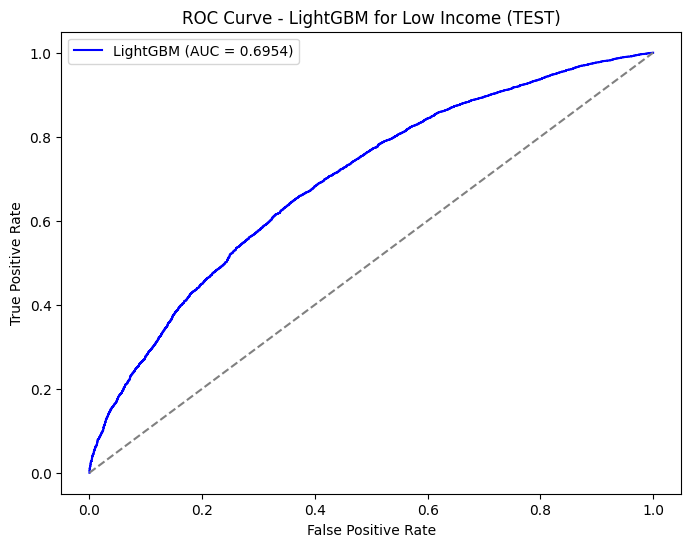


Feature Importance:
 dti                            2296
revol_util                     2180
int_rate                       1951
revol_bal                      1951
active_credit_pct              1942
credit_age                     1536
annual_inc                     1515
total_interest_owed            1336
loan_to_income                 1328
installment_to_income_ratio    1325
installment                    1285
emp_length                      973
loan_amnt                       943
mort_acc                        830
purpose                         689
grade                           341
home_ownership                  330
verification_status             325
pub_rec                         191
term                            120
initial_list_status             108
application_type                 78
dtype: int32
=== Training model for Mid Income Group ===

No duplicate IDs found in Mid Income split. The split is correct!

Scale_pos_weight for Mid Income: 0.2479
[LightGBM] [Info] Num

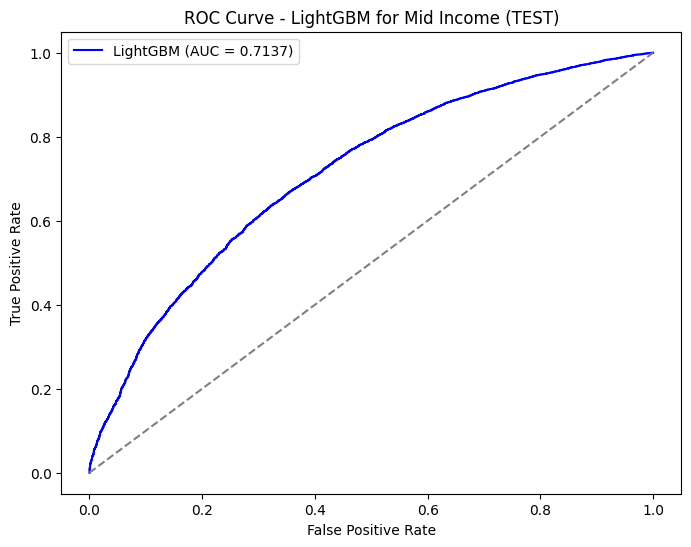


Feature Importance:
 active_credit_pct              2322
dti                            2317
revol_util                     2152
revol_bal                      2039
int_rate                       1926
annual_inc                     1516
total_interest_owed            1409
credit_age                     1347
loan_to_income                 1218
installment_to_income_ratio    1183
installment                    1129
mort_acc                       1081
loan_amnt                       922
emp_length                      888
purpose                         658
grade                           334
home_ownership                  319
verification_status             285
pub_rec                         193
term                            145
initial_list_status              89
application_type                 43
dtype: int32
=== Training model for High Income Group ===

No duplicate IDs found in High Income split. The split is correct!

Scale_pos_weight for High Income: 0.1858
[LightGBM] [Info] 

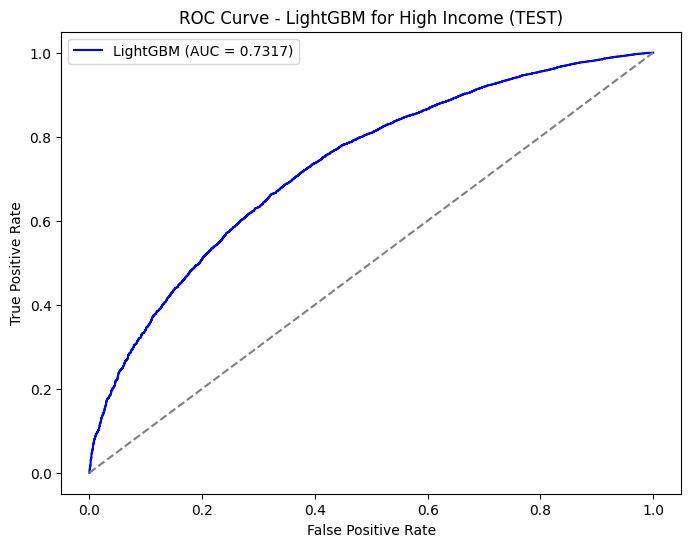


Feature Importance:
 dti                            2242
revol_bal                      2221
active_credit_pct              2165
revol_util                     2153
int_rate                       1818
annual_inc                     1508
credit_age                     1472
total_interest_owed            1416
loan_to_income                 1311
installment_to_income_ratio    1270
installment                    1223
mort_acc                       1171
emp_length                      908
loan_amnt                       860
purpose                         583
verification_status             309
grade                           302
home_ownership                  244
pub_rec                         188
term                            154
application_type                 44
initial_list_status              17
dtype: int32
=== Training General Model (Entire Dataset) ===

No duplicate IDs found in General Model split. The split is correct!

Scale_pos_weight for General Model: 0.2456
[LightGBM] 

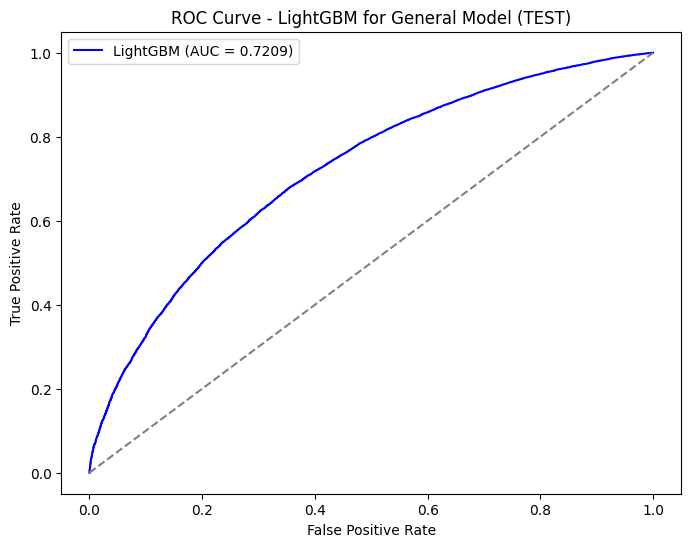


Feature Importance:
 int_rate                       2234
dti                            2175
revol_util                     2035
revol_bal                      1941
active_credit_pct              1819
annual_inc                     1525
loan_to_income                 1314
credit_age                     1288
installment_to_income_ratio    1264
installment                    1211
total_interest_owed            1182
mort_acc                       1116
loan_amnt                      1040
emp_length                      912
purpose                         776
grade                           420
home_ownership                  362
verification_status             308
pub_rec                         245
term                            243
initial_list_status              73
application_type                 62
dtype: int32

Combined Model Performance:
           group  train_accuracy  train_auc  test_accuracy  test_auc
0     Low Income        0.726714   0.810806       0.663506  0.695380
1     

In [84]:
results = []
models = {}

# Train and evaluate models for each income segment
print("=== Training model for Low Income Group ===")
low_income_result = train_model_on_group(low_income_df, "Low Income")
results.append(low_income_result)
models['low_income_model'] = low_income_result['model']

print("=== Training model for Mid Income Group ===")
mid_income_result = train_model_on_group(mid_income_df, "Mid Income")
results.append(mid_income_result)
models['mid_income_model'] = mid_income_result['model']

print("=== Training model for High Income Group ===")
high_income_result = train_model_on_group(high_income_df, "High Income")
results.append(high_income_result)
models['high_income_model'] = high_income_result['model']

# Train and evaluate the general model on the entire dataset
print("=== Training General Model (Entire Dataset) ===")
general_result = train_model_on_group(model_df, "General Model")
results.append(general_result)
models['general_model'] = general_result['model']

# Combine and display overall performance results
results_df = pd.DataFrame([{
    'group': r['group'],
    'train_accuracy': r['train_accuracy'],
    'train_auc': r['train_auc'],
    'test_accuracy': r['test_accuracy'],
    'test_auc': r['test_auc']
} for r in results])
print("\nCombined Model Performance:")
print(results_df)

# Optionally, print classification reports for each group
for r in results:
    print(f"\n--- {r['group']} ---")
    print("TRAIN Classification Report:")
    print(r['train_classification_report'])
    print("TEST Classification Report:")
    print(r['test_classification_report'])

In [86]:
# Prediction

prediction_df = pd.read_csv('/kaggle/input/rocket-companies/test (1).csv')
# Loan to income
prediction_df['loan_to_income'] = prediction_df['loan_amnt'] / prediction_df['annual_inc']

# Total interest owed
prediction_df['total_interest_owed'] = prediction_df['loan_amnt'] * (prediction_df['int_rate'] / 100)

# Installment to income ratio (assuming annual income is monthly income*12)
prediction_df['installment_to_income_ratio'] = prediction_df['installment'] / (prediction_df['annual_inc'] / 12)

# Active Credit Accounts pct (if total_acc > 0 else np.nan)
prediction_df['active_credit_pct'] = prediction_df.apply(
    lambda row: row['open_acc'] / row['total_acc'] if row['total_acc'] > 0 else np.nan, axis=1)

# Credit Age
prediction_df['earliest_cr_line'] = pd.to_datetime(prediction_df['earliest_cr_line'], errors='coerce')
current_year = pd.Timestamp('now').year
prediction_df['credit_age'] = current_year - prediction_df['earliest_cr_line'].dt.year

# Employee Length: fill missing with 'Unknown'
prediction_df['emp_length'].fillna('Unknown', inplace=True)

features = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'pub_rec', 'revol_bal', 'revol_util',
       'initial_list_status', 'application_type', 'mort_acc', 'loan_to_income',
       'total_interest_owed', 'installment_to_income_ratio',
       'active_credit_pct', 'credit_age']

final_pred_df = prediction_df[features].copy()
print("Final Prediction Data Shape:", final_pred_df.shape)

Final Prediction Data Shape: (79060, 22)


In [87]:
for col in final_pred_df.columns:
    if final_pred_df[col].dtype == 'object' or final_pred_df[col].dtype.name == 'category':
        le = LabelEncoder()
        final_pred_df[col] = le.fit_transform(final_pred_df[col].astype(str))

final_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79060 entries, 0 to 79059
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    79060 non-null  float64
 1   term                         79060 non-null  int64  
 2   int_rate                     79060 non-null  float64
 3   installment                  79060 non-null  float64
 4   grade                        79060 non-null  int64  
 5   emp_length                   79060 non-null  int64  
 6   home_ownership               79060 non-null  int64  
 7   annual_inc                   79060 non-null  float64
 8   verification_status          79060 non-null  int64  
 9   purpose                      79060 non-null  int64  
 10  dti                          79060 non-null  float64
 11  pub_rec                      79060 non-null  float64
 12  revol_bal                    79060 non-null  float64
 13  revol_util      

In [88]:
X_pred_all = final_pred_df.copy()

In [89]:
low_threshold = 50000.0
mid_threshold = 78315.71360000008

pred_low_income = final_pred_df[final_pred_df['annual_inc'] < low_threshold]
pred_mid_income = final_pred_df[(final_pred_df['annual_inc'] >= low_threshold) &
                                (final_pred_df['annual_inc'] < mid_threshold)]
pred_high_income = final_pred_df[final_pred_df['annual_inc'] >= mid_threshold]

print("Low Income Segment Shape:", pred_low_income.shape)
print("Mid Income Segment Shape:", pred_mid_income.shape)
print("High Income Segment Shape:", pred_high_income.shape)

Low Income Segment Shape: (23469, 22)
Mid Income Segment Shape: (28775, 22)
High Income Segment Shape: (26816, 22)


In [90]:
X_pred_low = pred_low_income.copy()
X_pred_mid = pred_mid_income.copy()
X_pred_high = pred_high_income.copy()

In [92]:
from collections import Counter

predictions = {}

if not X_pred_low.empty:
    y_pred_low = models['low_income_model'].predict(X_pred_low)
    y_pred_low_proba = models['low_income_model'].predict_proba(X_pred_low)[:, 1]
    predictions['low_income'] = y_pred_low_proba
    # Print class distribution percentages for Low Income segment
    counter_low = Counter(y_pred_low)
    total_low = sum(counter_low.values())
    percentages_low = {key: (value / total_low) * 100 for key, value in counter_low.items()}
    print("\nLow Income Prediction Distribution (in %):", percentages_low)
else:
    print("No records in Low Income segment.")

if not X_pred_mid.empty:
    y_pred_mid = models['mid_income_model'].predict(X_pred_mid)
    y_pred_mid_proba = models['mid_income_model'].predict_proba(X_pred_mid)[:, 1]
    predictions['mid_income'] = y_pred_mid_proba
    # Print class distribution percentages for Mid Income segment
    counter_mid = Counter(y_pred_mid)
    total_mid = sum(counter_mid.values())
    percentages_mid = {key: (value / total_mid) * 100 for key, value in counter_mid.items()}
    print("\nMid Income Prediction Distribution (in %):", percentages_mid)
else:
    print("No records in Mid Income segment.")

if not X_pred_high.empty:
    y_pred_high = models['high_income_model'].predict(X_pred_high)
    y_pred_high_proba = models['high_income_model'].predict_proba(X_pred_high)[:, 1]
    predictions['high_income'] = y_pred_high_proba
    # Print class distribution percentages for High Income segment
    counter_high = Counter(y_pred_high)
    total_high = sum(counter_high.values())
    percentages_high = {key: (value / total_high) * 100 for key, value in counter_high.items()}
    print("\nHigh Income Prediction Distribution (in %):", percentages_high)
else:
    print("No records in High Income segment.")


Low Income Prediction Distribution (in %): {1: 61.37457923217862, 0: 38.62542076782138}

Mid Income Prediction Distribution (in %): {1: 63.694178974804515, 0: 36.305821025195485}

High Income Prediction Distribution (in %): {1: 65.6697494033413, 0: 34.330250596658715}


In [94]:
if not X_pred_all.empty:
    y_pred_general = models['general_model'].predict(X_pred_all)
    y_pred_general_proba = models['general_model'].predict_proba(X_pred_all)[:, 1]
    predictions['general_model'] = y_pred_general_proba
    counter_general = Counter(y_pred_general)
    total_general = sum(counter_general.values())
    percentages_general = {key: (value / total_general) * 100 for key, value in counter_general.items()}
    print("\nGeneral Model Prediction Distribution (in %):", percentages_general)
else:
    print("No records.")


General Model Prediction Distribution (in %): {1: 61.21300278269669, 0: 38.786997217303316}
